In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=10511d2caa3a92bac5cc17ba0291c8188a6514947a2dd543d79e1fcb11a34eef
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
  import requests
  import datetime
  import pandas as pd
  import pandas_ta as ta
  import matplotlib.pyplot as plt

  def fetch_cryptocurrency_data(crypto_symbol='BTC', currency_symbol='USD'):
      # API endpoint
      url = f"https://min-api.cryptocompare.com/data/v2/histoday?fsym={crypto_symbol}&tsym={currency_symbol}&allData=true"

      # Get the data from the API
      response = requests.get(url)
      data = response.json()

      # Check if the response was successful
      if data['Response'] == "Success":
          return data['Data']['Data']
      else:
          raise Exception("Failed to fetch data from API")

  def process_data(historical_data, crypto_symbol):
      # Create an empty list to store the processed data
      processed_data = []

      # Process each day's data
      for day_data in historical_data:
          timestamp = day_data['time']
          date = datetime.datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d')
          high = day_data['high']
          low = day_data['low']
          open_price = day_data['open']
          close_price = day_data['close']
          volume_from = day_data['volumefrom']
          volume_to = day_data['volumeto']

          # Append the data to the list
          processed_data.append([date, crypto_symbol, open_price, high, low, close_price, volume_from, volume_to])

      # Create a DataFrame from the processed data
      columns = ['Date','Coin', 'Open', 'High', 'Low', 'Close', 'Volume_BTC', 'Volume_USD']
      btc_data = pd.DataFrame(processed_data, columns=columns)

      # Set the 'Date' column as the index
      btc_data['Date'] = pd.to_datetime(btc_data['Date'])
      btc_data.set_index('Date', inplace=True)

      return btc_data

  def calculate_technical_indicators(btc_data):
      # Calculate technical indicators
      btc_data['SMA'] = ta.sma(btc_data['Close'], length=14)
      btc_data['EMA'] = ta.ema(btc_data['Close'], length=14)

      # Calculate Bollinger Bands
      bollinger = ta.bbands(btc_data['Close'])
      btc_data['Bollinger_Low'] = bollinger['BBL_5_2.0']
      btc_data['Bollinger_Mid'] = bollinger['BBM_5_2.0']
      btc_data['Bollinger_High'] = bollinger['BBU_5_2.0']

      btc_data['ATR'] = ta.atr(btc_data['High'], btc_data['Low'], btc_data['Close'])
      btc_data['RSI'] = ta.rsi(btc_data['Close'])

      # Calculate MACD
      macd = ta.macd(btc_data['Close'])
      btc_data['MACD'] = macd['MACD_12_26_9']
      btc_data['MACD_signal'] = macd['MACDs_12_26_9']
      btc_data['MACD_diff'] = macd['MACDh_12_26_9']

      btc_data['OBV'] = ta.obv(btc_data['Close'], btc_data['Volume_USD'])
      btc_data['Volume_Oscillator'] = ta.adosc(btc_data['High'], btc_data['Low'], btc_data['Close'], btc_data['Volume_USD'])

      # Calculate Parabolic SAR
      parabolic_sar = ta.psar(btc_data['High'], btc_data['Low'], btc_data['Close'])
      btc_data['Parabolic_SAR_Acceleration_Factor'] = parabolic_sar['PSARaf_0.02_0.2']
      btc_data['Parabolic_SAR_Reverse'] = parabolic_sar['PSARr_0.02_0.2']

      # Calculate ADX
      adx = ta.adx(btc_data['High'], btc_data['Low'], btc_data['Close'])
      btc_data['ADX'] = adx['ADX_14']
      btc_data['ADX+'] = adx['DMP_14']  # Plus Directional Indicator
      btc_data['ADX-'] = adx['DMN_14']  # Minus Directional Indicator

      # Calculate Stochastic Oscillator
      stoch = ta.stoch(btc_data['High'], btc_data['Low'], btc_data['Close'])
      btc_data['Stochastic_Oscillator'] = stoch['STOCHk_14_3_3']

      btc_data['Williams_%R'] = ta.willr(btc_data['High'], btc_data['Low'], btc_data['Close'])

      return btc_data

  def filter_data_by_date(btc_data, start_date, end_date):
      return btc_data.loc[start_date:end_date]

  def main(crypto_symbol='BTC', currency_symbol='USD', start_date='2021-01-01', end_date='2024-01-01'):
      historical_data = fetch_cryptocurrency_data(crypto_symbol, currency_symbol)
      btc_data = process_data(historical_data, crypto_symbol)
      btc_data = calculate_technical_indicators(btc_data)
      filtered_btc_data = filter_data_by_date(btc_data, start_date, end_date)
      return filtered_btc_data

  if __name__ == "__main__":
      crypto_symbol = 'BTC'  # Specify the cryptocurrency symbol here
      currency_symbol = 'USD'  # Specify the currency symbol here
      start_date = '2021-01-01'  # Specify the start date here
      end_date = '2024-01-01'  # Specify the end date here

      filtered_btc_data = main(crypto_symbol, currency_symbol, start_date, end_date)
      nan_counts = filtered_btc_data.isna().sum()
      print(nan_counts)


Coin                                 0
Open                                 0
High                                 0
Low                                  0
Close                                0
Volume_BTC                           0
Volume_USD                           0
SMA                                  0
EMA                                  0
Bollinger_Low                        0
Bollinger_Mid                        0
Bollinger_High                       0
ATR                                  0
RSI                                  0
MACD                                 0
MACD_signal                          0
MACD_diff                            0
OBV                                  0
Volume_Oscillator                    0
Parabolic_SAR_Acceleration_Factor    0
Parabolic_SAR_Reverse                0
ADX                                  0
ADX+                                 0
ADX-                                 0
Stochastic_Oscillator                0
Williams_%R              

In [ ]:
import requests
import pandas as pd
import datetime

def fetch_fundamental_data(crypto_symbol='BTC', api_key='your_api_key'):
    # API endpoint
    url = f"https://min-api.cryptocompare.com/data/blockchain/histo/day?fsym={crypto_symbol}&limit=2000&api_key={api_key}"

    # Get the data from the API
    response = requests.get(url)
    data = response.json()

    # Check if the response was successful
    if data['Response'] == "Success":
        return data['Data']['Data']
    else:
        raise Exception("Failed to fetch data from API")

def process_fundamental_data(historical_data):
    # Create a DataFrame from the historical data
    df = pd.DataFrame(historical_data)

    # Convert the 'time' column to datetime
    df['time'] = pd.to_datetime(df['time'], unit='s')
    df.set_index('time', inplace=True)

    return df

def filter_fundamental_data_by_date(df, start_date, end_date):
    # Filter the DataFrame by date range
    filtered_df = df.loc[start_date:end_date]
    return filtered_df

def main_fundamental(crypto_symbol='BTC', start_date='2021-01-01', end_date='2024-01-01', api_key='your_api_key'):
    historical_data = fetch_fundamental_data(crypto_symbol, api_key)
    df = process_fundamental_data(historical_data)
    filtered_df = filter_fundamental_data_by_date(df, start_date, end_date)
    return filtered_df

if __name__ == "__main__":
    crypto_symbol = 'BTC'  # Specify the cryptocurrency symbol here
    start_date = '2021-01-01'  # Specify the start date here
    end_date = '2024-01-01'  # Specify the end date here
    api_key = '87723662579aa6560d429cb7241d744bf5cbb2470520f005bcfe070c76121d00'  # Specify your API key here

    filtered_fundamental_data = main_fundamental(crypto_symbol, start_date, end_date, api_key)

In [ ]:
def get_combined_data(crypto_symbols, start_date, end_date, api_key):
    all_data = []
    for crypto_symbol in crypto_symbols:
        try:
            # Fetch and process technical data
            technical_data_raw = fetch_cryptocurrency_data(crypto_symbol)
            technical_data = process_data(technical_data_raw, crypto_symbol)
            technical_data = calculate_technical_indicators(technical_data)
            technical_data_filtered = filter_data_by_date(technical_data, start_date, end_date)


            # Fetch and process fundamental data
            fundamental_data_raw = fetch_fundamental_data(crypto_symbol, api_key)
            fundamental_data = process_fundamental_data(fundamental_data_raw)
            fundamental_data_filtered = filter_data_by_date(fundamental_data, start_date, end_date)

            # Combine technical and fundamental data
            combined_data = technical_data_filtered.join(fundamental_data_filtered, lsuffix='_tech', rsuffix='_fund')

            all_data.append(combined_data)
        except Exception as e:
            print(f"Failed to get data for {crypto_symbol}: {e}")

    # Concatenate all data into a single DataFrame
    if all_data:
        final_data = pd.concat(all_data)
    else:
        final_data = pd.DataFrame()

    return final_data

if __name__ == "__main__":
    crypto_symbols = ['BTC', 'ETH', 'LTC', 'DOGE' ]  # Specify the list of cryptocurrency symbols here
    start_date = '2021-01-01'  # Specify the start date here
    end_date = '2024-01-01'  # Specify the end date here
    api_key = '87723662579aa6560d429cb7241d744bf5cbb2470520f005bcfe070c76121d00'  # Specify your API key here

    data = get_combined_data(crypto_symbols, start_date, end_date, api_key)

In [ ]:
data = data.drop(columns=['id', 'symbol'])

In [ ]:
data

,Coin,Open,High,Low,Close,Volume_BTC,Volume_USD,SMA,EMA,Bollinger_Low,...,transaction_count,transaction_count_all_time,large_transaction_count,average_transaction_value,block_height,hashrate,difficulty,block_time,block_size,current_supply
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,BTC,28972.40000,29666.33000,28748.21000,29388.94000,5.084173e+04,1.487306e+09,25705.718571,26001.312544,26442.994316,...,258080,601834524,15797,6.212788,664061,1.373737e+08,1.859959e+13,581.513514,1352232,1.858796e+07
2021-01-02,BTC,29388.94000,33257.29000,29036.26000,32203.64000,1.192148e+05,3.750441e+09,26302.784286,26828.289538,26206.435301,...,297111,602131635,22745,7.284999,664212,1.396048e+08,1.859959e+13,572.220000,1395637,1.858891e+07
2021-01-03,BTC,32203.64000,34789.34000,32010.59000,33063.48000,9.351099e+04,3.132759e+09,26988.242857,27659.648267,26966.934688,...,359116,602490751,24479,6.159027,664370,1.488970e+08,1.859959e+13,536.509554,1288693,1.858991e+07
2021-01-04,BTC,33063.48000,33622.70000,28493.29000,32030.55000,1.249097e+05,3.901979e+09,27652.772857,28242.435164,27859.060090,...,373734,602864485,27457,5.144091,664543,1.594337e+08,1.859959e+13,501.052326,1318806,1.859090e+07
2021-01-05,BTC,32030.55000,34487.44000,29985.29000,34038.29000,9.373547e+04,3.037657e+09,28382.413571,29015.215809,29041.361891,...,354091,603218576,25699,6.241091,664700,1.454805e+08,1.859959e+13,549.108974,1292713,1.859200e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,DOGE,0.09367,0.09498,0.09109,0.09177,2.837260e+08,2.638037e+07,0.093088,0.093000,0.090200,...,960944,185389305,1341,17810.043579,5025355,8.844191e+02,1.316255e+07,63.920741,264191,1.424398e+11
2023-12-29,DOGE,0.09177,0.09303,0.08864,0.09101,2.620044e+08,2.392561e+07,0.092946,0.092734,0.089773,...,742593,186131898,1276,19594.689191,5026714,8.848679e+02,1.309332e+07,63.552283,204626,1.424398e+11
2023-12-30,DOGE,0.09101,0.09140,0.08926,0.09001,1.258114e+08,1.139420e+07,0.092440,0.092371,0.089160,...,759987,186891885,972,14100.270655,5028079,9.095739e+02,1.339441e+07,63.247801,209059,1.424533e+11


In [ ]:
data

,Coin,Open,High,Low,Close,Volume_BTC,Volume_USD,SMA,EMA,Bollinger_Low,...,transaction_count,transaction_count_all_time,large_transaction_count,average_transaction_value,block_height,hashrate,difficulty,block_time,block_size,current_supply
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,BTC,28972.40000,29666.33000,28748.21000,29388.94000,5.084173e+04,1.487306e+09,25705.718571,26001.312544,26442.994316,...,258080,601834524,15797,6.212788,664061,1.373737e+08,1.859959e+13,581.513514,1352232,1.858796e+07
2021-01-02,BTC,29388.94000,33257.29000,29036.26000,32203.64000,1.192148e+05,3.750441e+09,26302.784286,26828.289538,26206.435301,...,297111,602131635,22745,7.284999,664212,1.396048e+08,1.859959e+13,572.220000,1395637,1.858891e+07
2021-01-03,BTC,32203.64000,34789.34000,32010.59000,33063.48000,9.351099e+04,3.132759e+09,26988.242857,27659.648267,26966.934688,...,359116,602490751,24479,6.159027,664370,1.488970e+08,1.859959e+13,536.509554,1288693,1.858991e+07
2021-01-04,BTC,33063.48000,33622.70000,28493.29000,32030.55000,1.249097e+05,3.901979e+09,27652.772857,28242.435164,27859.060090,...,373734,602864485,27457,5.144091,664543,1.594337e+08,1.859959e+13,501.052326,1318806,1.859090e+07
2021-01-05,BTC,32030.55000,34487.44000,29985.29000,34038.29000,9.373547e+04,3.037657e+09,28382.413571,29015.215809,29041.361891,...,354091,603218576,25699,6.241091,664700,1.454805e+08,1.859959e+13,549.108974,1292713,1.859200e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,DOGE,0.09367,0.09498,0.09109,0.09177,2.837260e+08,2.638037e+07,0.093088,0.093000,0.090200,...,960944,185389305,1341,17810.043579,5025355,8.844191e+02,1.316255e+07,63.920741,264191,1.424398e+11
2023-12-29,DOGE,0.09177,0.09303,0.08864,0.09101,2.620044e+08,2.392561e+07,0.092946,0.092734,0.089773,...,742593,186131898,1276,19594.689191,5026714,8.848679e+02,1.309332e+07,63.552283,204626,1.424398e+11
2023-12-30,DOGE,0.09101,0.09140,0.08926,0.09001,1.258114e+08,1.139420e+07,0.092440,0.092371,0.089160,...,759987,186891885,972,14100.270655,5028079,9.095739e+02,1.339441e+07,63.247801,209059,1.424533e+11


ALl coins LSTM

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df = data

# Retain the original 'Coin' column
df['Coin_original'] = df['Coin']

# Check for NaN or null values in each coin
coins_with_nan = {}

for coin in df['Coin_original'].unique():
    coin_data = df[df['Coin_original'] == coin]
    if coin_data.isnull().values.any():
        coins_with_nan[coin] = coin_data.isnull().sum()

# Print results
if coins_with_nan:
    print("Coins with NaN or null values:")
    for coin, nan_counts in coins_with_nan.items():
        print(f"\n{coin}:")
        print(nan_counts)
else:
    print("No NaN or null values found in any coin data.")


No NaN or null values found in any coin data.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset
df = data

# Retain the original 'Coin' column
df['Coin_original'] = df['Coin']

# One-hot encode the 'Coin' column
df = pd.get_dummies(df, columns=['Coin'])

# Scale data for each coin separately
scalers = {}
for coin in df['Coin_original'].unique():
    scalers[coin] = MinMaxScaler()
    coin_data = df[df['Coin_original'] == coin]
    df.loc[df['Coin_original'] == coin, df.columns.difference(['Coin_original'])] = scalers[coin].fit_transform(coin_data[df.columns.difference(['Coin_original'])])

# Drop the 'Coin_original' column if not needed further
df = df.drop(columns=['Coin_original'])

# Create sequences for LSTM
def create_sequences(data, seq_length=60, target_column='Close'):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length].values
        target = data.iloc[i + seq_length][target_column]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences, dtype=np.float32), np.array(targets, dtype=np.float32)

sequences, targets = create_sequences(df)

# Ensure data types are correct
sequences = np.array(sequences, dtype=np.float32)
targets = np.array(targets, dtype=np.float32)

# Split data into training and testing sets
train_size = int(len(sequences) * 0.8)
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, shuffle=False)

# Build and compile LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


Epoch 1/50
55/55 [==============================] - 10s 117ms/step - loss: 0.0257 - val_loss: 0.0027
Epoch 2/50
55/55 [==============================] - 4s 76ms/step - loss: 0.0031 - val_loss: 0.0040
Epoch 3/50
55/55 [==============================] - 4s 71ms/step - loss: 0.0024 - val_loss: 0.0028
Epoch 4/50
55/55 [==============================] - 5s 86ms/step - loss: 0.0020 - val_loss: 0.0026
Epoch 5/50
55/55 [==============================] - 5s 90ms/step - loss: 0.0018 - val_loss: 8.4699e-04
Epoch 6/50
55/55 [==============================] - 4s 70ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 7/50
55/55 [==============================] - 4s 69ms/step - loss: 0.0015 - val_loss: 9.0196e-04
Epoch 8/50
55/55 [==============================] - 6s 108ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 9/50
55/55 [==============================] - 7s 124ms/step - loss: 0.0013 - val_loss: 3.4701e-04
Epoch 10/50
55/55 [==============================] - 8s 140ms/step - loss: 0.0013 - val_loss:

In [ ]:
scalers

{'BTC': MinMaxScaler(),
 'ETH': MinMaxScaler(),
 'LTC': MinMaxScaler(),
 'DOGE': MinMaxScaler()}

28/28 [==============================] - 1s 31ms/step
(865, 47)
(865, 47)


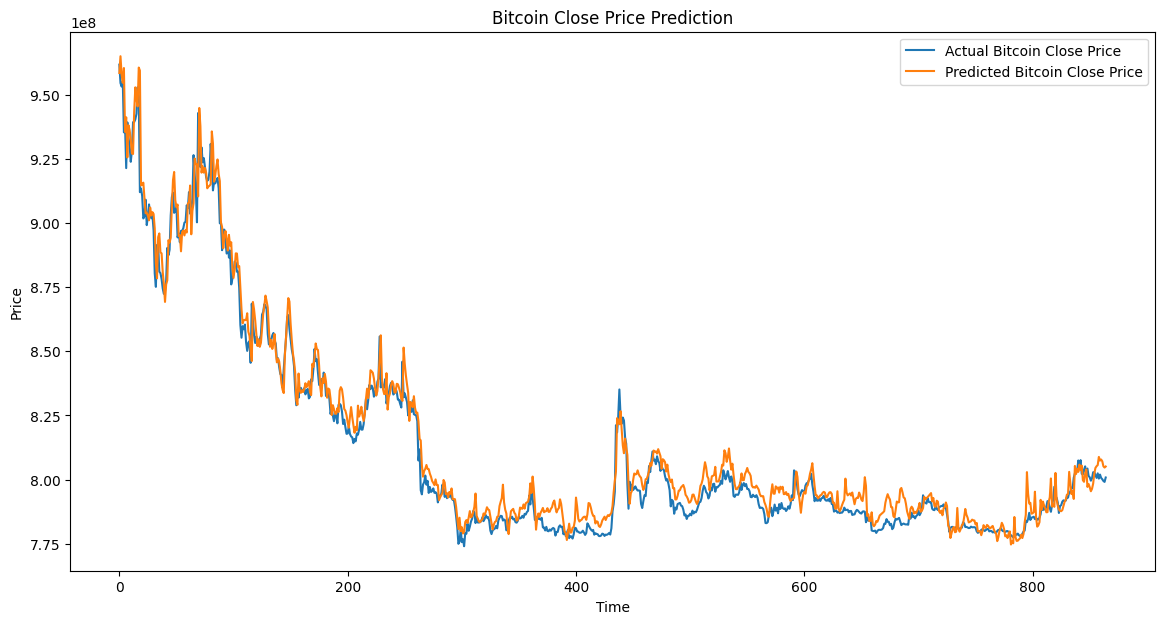

BTC - Predictions within 2%: 853 / 865
BTC - Predictions within 5%: 864 / 865
BTC - Predictions in correct direction: 425 / 864


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to their original scale
def inverse_transform(data, scaler, n_features):
    expanded_data = np.zeros((data.shape[0], n_features))
    expanded_data[:, -1] = data.flatten()
    print(expanded_data.shape)
    return scaler.inverse_transform(expanded_data)[:, -1]

# Use the Bitcoin scaler for inverse transform
bitcoin_scaler = scalers['BTC']

n_features = bitcoin_scaler.min_.shape[0]


y_test_inverse = inverse_transform(y_test, bitcoin_scaler, n_features)
y_pred_inverse = inverse_transform(y_pred, bitcoin_scaler, n_features)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test_inverse, label='Actual Bitcoin Close Price')
plt.plot(y_pred_inverse, label='Predicted Bitcoin Close Price')
plt.title('Bitcoin Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate metrics
within_2_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.02)
within_5_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.05)
correct_direction = np.sum(np.sign(y_pred_inverse[1:] - y_pred_inverse[:-1]) == np.sign(y_test_inverse[1:] - y_test_inverse[:-1]))

total_predictions = len(y_test_inverse)
print(f'{coin} - Predictions within 2%: {within_2_percent} / {total_predictions}')
print(f'{coin} - Predictions within 5%: {within_5_percent} / {total_predictions}')
print(f'{coin} - Predictions in correct direction: {correct_direction} / {total_predictions - 1}')

In [ ]:
if __name__ == "__main__":
    crypto_symbols = ['BTC', 'ETH', 'LTC', 'DOGE' ]  # Specify the list of cryptocurrency symbols here
    start_date = '2024-01-01'  # Specify the start date here
    end_date = '2025-01-01'  # Specify the end date here
    api_key = '87723662579aa6560d429cb7241d744bf5cbb2470520f005bcfe070c76121d00'  # Specify your API key here

    new_data = get_combined_data(crypto_symbols, start_date, end_date, api_key)

In [ ]:
# Drop all rows with any NaN or null values
new_data_cleaned = new_data.dropna()

# Display the number of dropped rows
dropped_rows = len(new_data) - len(new_data_cleaned)
print(f"Number of rows dropped: {dropped_rows}")

# Verify the result
print(new_data_cleaned.info())


Number of rows dropped: 5
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 591 entries, 2024-01-01 to 2024-05-27
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Coin                               591 non-null    object 
 1   Open                               591 non-null    float64
 2   High                               591 non-null    float64
 3   Low                                591 non-null    float64
 4   Close                              591 non-null    float64
 5   Volume_BTC                         591 non-null    float64
 6   Volume_USD                         591 non-null    float64
 7   SMA                                591 non-null    float64
 8   EMA                                591 non-null    float64
 9   Bollinger_Low                      591 non-null    float64
 10  Bollinger_Mid                      591 non-null    float64
 11  Bollinger_Hig

In [ ]:
new_data

,Coin,Open,High,Low,Close,Volume_BTC,Volume_USD,SMA,EMA,Bollinger_Low,...,transaction_count,transaction_count_all_time,large_transaction_count,average_transaction_value,block_height,hashrate,difficulty,block_time,block_size,current_supply
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,BTC,42280.1400,44210.8900,42187.3200,44197.6100,1.949959e+04,8.398942e+08,43103.119286,42857.702625,41076.985563,...,657752.0,946553020.0,10881.0,0.807423,823940.0,5.705705e+08,7.200615e+13,542.025974,1653640.0,1.958713e+07
2024-01-02,BTC,44197.6100,45918.9800,44181.8600,44970.3400,5.744336e+04,2.596745e+09,43296.137857,43139.387608,40711.470033,...,367319.0,946920339.0,16266.0,2.312023,824071.0,4.741971e+08,7.200615e+13,652.184615,1718455.0,1.958795e+07
2024-01-03,BTC,44970.3400,45513.7300,40214.6700,42854.0800,8.205619e+04,3.533041e+09,43237.864286,43101.346594,41068.683700,...,502749.0,947423088.0,16505.0,1.709354,824229.0,5.697609e+08,7.200615e+13,542.796178,1771465.0,1.958892e+07
2024-01-04,BTC,42854.0800,44797.0300,42657.4400,44194.3800,4.953894e+04,2.167749e+09,43260.676429,43247.084381,41732.104531,...,482557.0,947905645.0,23909.0,2.185153,824399.0,6.101663e+08,7.200615e+13,506.852071,1782401.0,1.959086e+07
2024-01-05,BTC,44194.3800,44377.1500,42508.0800,44178.8900,5.416930e+04,2.368277e+09,43272.880000,43371.325130,42713.109819,...,420884.0,948326529.0,21811.0,1.867757,824537.0,4.951058e+08,7.200615e+13,624.642336,1774551.0,1.959086e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-24,DOGE,0.1596,0.1732,0.1551,0.1638,9.608989e+08,1.579372e+08,0.154764,0.157449,0.158212,...,117210.0,279457025.0,1593.0,86781.100092,5225617.0,1.168369e+03,1.723672e+07,63.362832,42788.0,1.444294e+11
2024-05-25,DOGE,0.1638,0.1742,0.1627,0.1739,4.526545e+08,7.598276e+07,0.156971,0.159643,0.156814,...,74440.0,279531465.0,1295.0,97407.419071,5226961.0,1.108473e+03,1.659825e+07,64.312733,25115.0,1.444427e+11
2024-05-26,DOGE,0.1739,0.1749,0.1654,0.1661,4.486472e+08,7.628960e+07,0.158750,0.160504,0.156615,...,33249.0,279564714.0,1509.0,219297.070501,5228304.0,1.063399e+03,1.590860e+07,64.253353,12878.0,1.444562e+11


In [ ]:
# Drop all rows with any NaN or null values
new_data_cleaned = new_data.dropna()

# Display the number of dropped rows
dropped_rows = len(new_data) - len(new_data_cleaned)
print(f"Number of rows dropped: {dropped_rows}")

# Verify the result
print(new_data_cleaned.info())


Number of rows dropped: 5
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 591 entries, 2024-01-01 to 2024-05-27
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Coin                               591 non-null    object 
 1   Open                               591 non-null    float64
 2   High                               591 non-null    float64
 3   Low                                591 non-null    float64
 4   Close                              591 non-null    float64
 5   Volume_BTC                         591 non-null    float64
 6   Volume_USD                         591 non-null    float64
 7   SMA                                591 non-null    float64
 8   EMA                                591 non-null    float64
 9   Bollinger_Low                      591 non-null    float64
 10  Bollinger_Mid                      591 non-null    float64
 11  Bollinger_Hig

In [ ]:
new_data_cleaned = new_data_cleaned.drop(columns=['id', 'symbol'])

In [ ]:
new_data_cleaned['Coin_original'] = new_data_cleaned['Coin']
new_data_cleaned1 = new_data_cleaned.copy()
new_data_cleaned = pd.get_dummies(new_data_cleaned, columns=['Coin'])


In [ ]:
new_data_cleaned

,Open,High,Low,Close,Volume_BTC,Volume_USD,SMA,EMA,Bollinger_Low,Bollinger_Mid,...,hashrate,difficulty,block_time,block_size,current_supply,Coin_original,Coin_BTC,Coin_DOGE,Coin_ETH,Coin_LTC
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,42280.1400,44210.8900,42187.3200,44197.6100,1.949959e+04,8.398942e+08,43103.119286,42857.702625,41076.985563,42657.26200,...,5.705705e+08,7.200615e+13,542.025974,1653640.0,1.958713e+07,BTC,True,False,False,False
2024-01-02,44197.6100,45918.9800,44181.8600,44970.3400,5.744336e+04,2.596745e+09,43296.137857,43139.387608,40711.470033,43133.54200,...,4.741971e+08,7.200615e+13,652.184615,1718455.0,1.958795e+07,BTC,True,False,False,False
2024-01-03,44970.3400,45513.7300,40214.6700,42854.0800,8.205619e+04,3.533041e+09,43237.864286,43101.346594,41068.683700,43289.64000,...,5.697609e+08,7.200615e+13,542.796178,1771465.0,1.958892e+07,BTC,True,False,False,False
2024-01-04,42854.0800,44797.0300,42657.4400,44194.3800,4.953894e+04,2.167749e+09,43260.676429,43247.084381,41732.104531,43699.31000,...,6.101663e+08,7.200615e+13,506.852071,1782401.0,1.959086e+07,BTC,True,False,False,False
2024-01-05,44194.3800,44377.1500,42508.0800,44178.8900,5.416930e+04,2.368277e+09,43272.880000,43371.325130,42713.109819,44079.06000,...,4.951058e+08,7.200615e+13,624.642336,1774551.0,1.959086e+07,BTC,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-23,0.1662,0.1693,0.1520,0.1596,7.200874e+08,1.157319e+08,0.153343,0.156472,0.147447,0.16218,...,1.121703e+03,1.675187e+07,64.142431,28993.0,1.444157e+11,DOGE,False,True,False,False
2024-05-24,0.1596,0.1732,0.1551,0.1638,9.608989e+08,1.579372e+08,0.154764,0.157449,0.158212,0.16512,...,1.168369e+03,1.723672e+07,63.362832,42788.0,1.444294e+11,DOGE,False,True,False,False
2024-05-25,0.1638,0.1742,0.1627,0.1739,4.526545e+08,7.598276e+07,0.156971,0.159643,0.156814,0.16674,...,1.108473e+03,1.659825e+07,64.312733,25115.0,1.444427e+11,DOGE,False,True,False,False


Processing BTC...
3/3 [==============================] - 0s 30ms/step


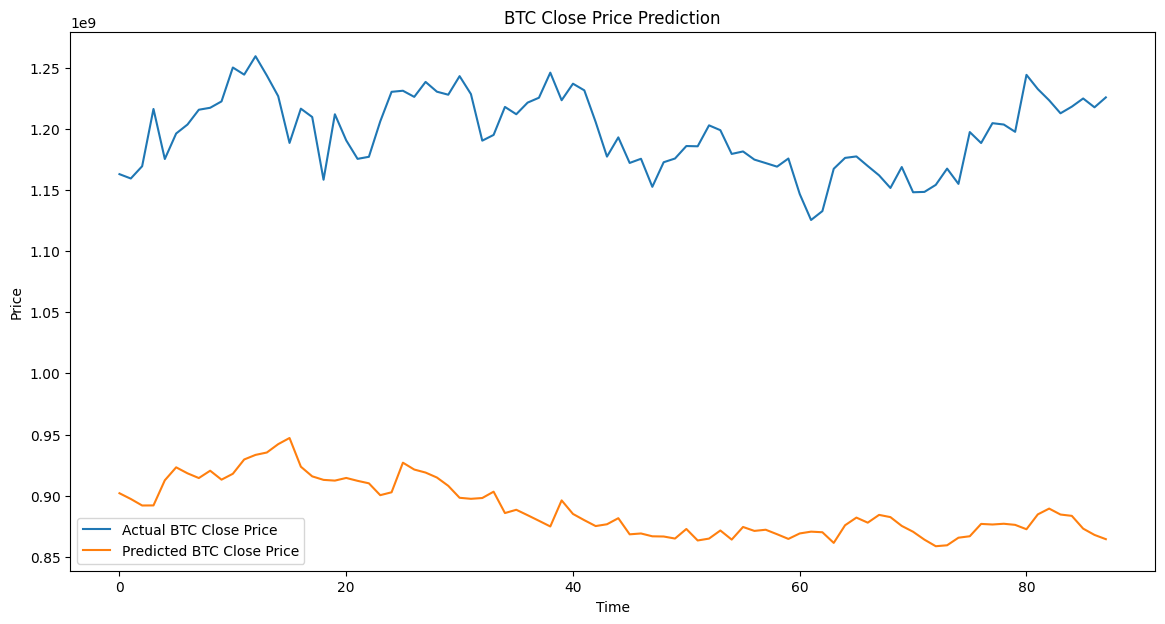

BTC - Predictions within 2%: 0 / 88
BTC - Predictions within 5%: 0 / 88
BTC - Predictions in correct direction: 39 / 87
Processing ETH...
3/3 [==============================] - 0s 18ms/step


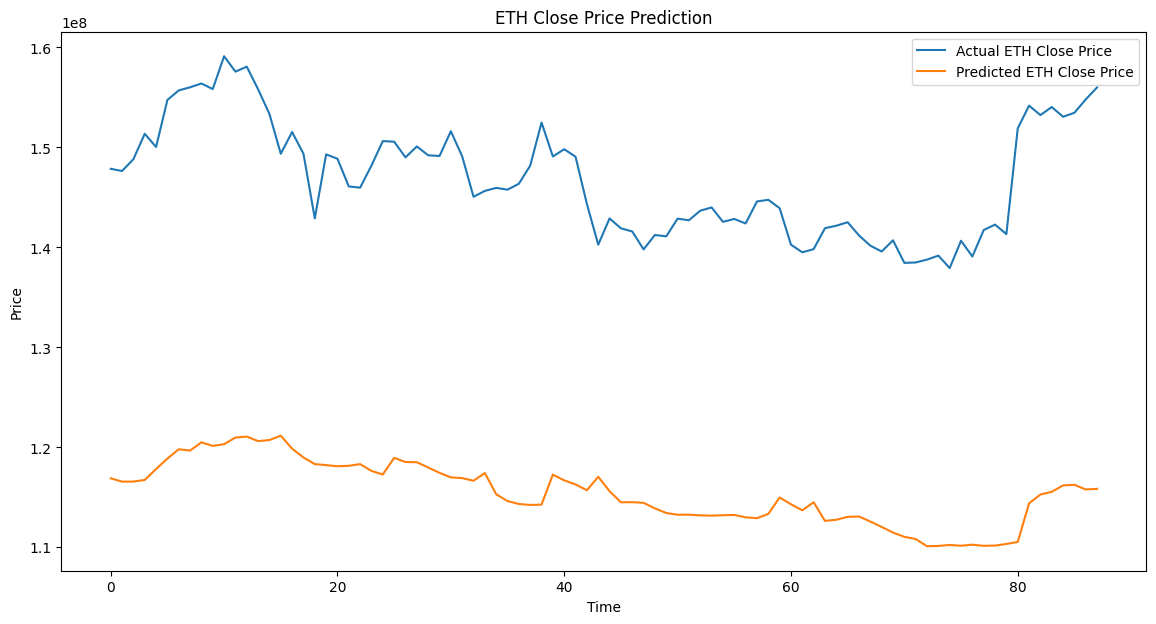

ETH - Predictions within 2%: 0 / 88
ETH - Predictions within 5%: 0 / 88
ETH - Predictions in correct direction: 44 / 87
Processing LTC...
3/3 [==============================] - 0s 19ms/step


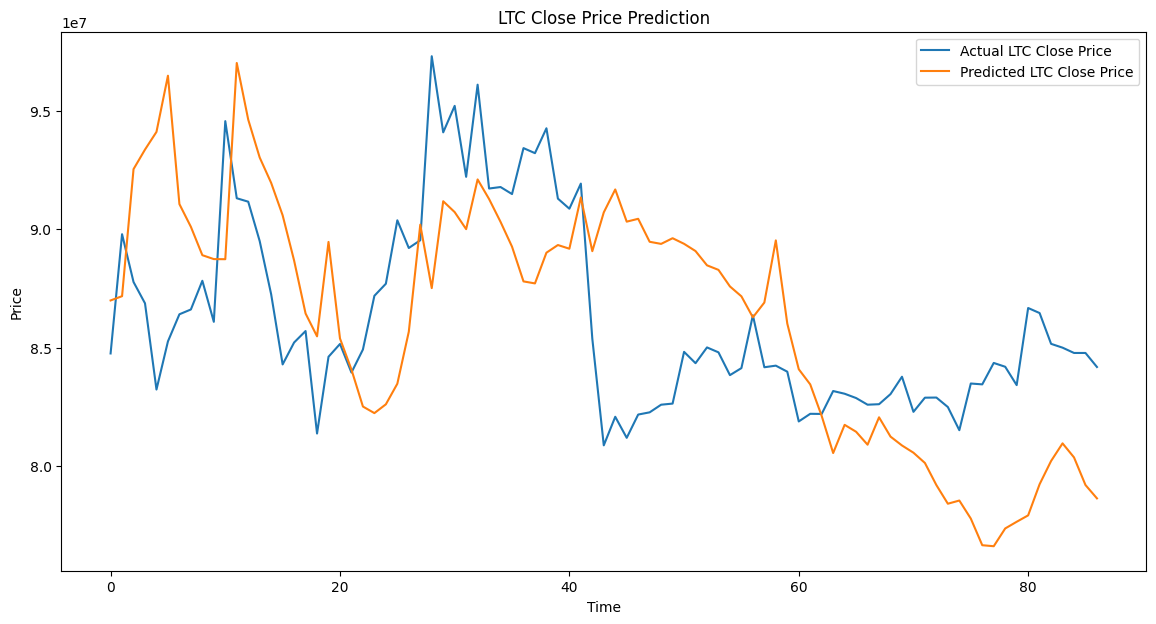

LTC - Predictions within 2%: 15 / 87
LTC - Predictions within 5%: 48 / 87
LTC - Predictions in correct direction: 42 / 86
Processing DOGE...
3/3 [==============================] - 0s 20ms/step


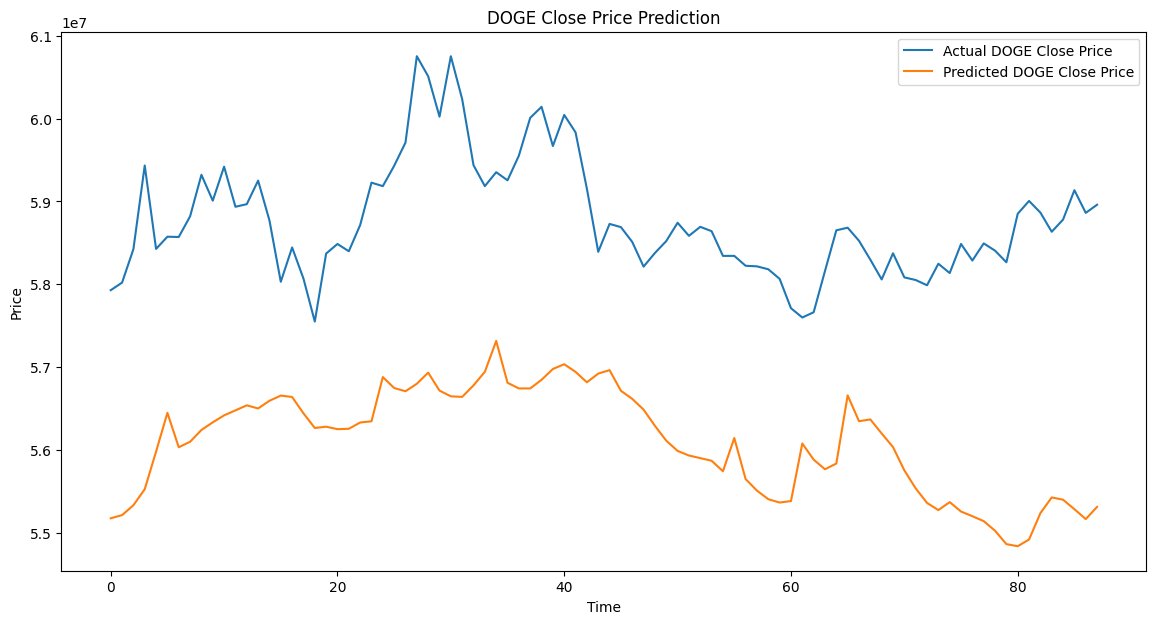

DOGE - Predictions within 2%: 0 / 88
DOGE - Predictions within 5%: 61 / 88
DOGE - Predictions in correct direction: 48 / 87


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Function to create sequences for LSTM
def create_sequences(data, seq_length=60, target_column='Close'):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length].values
        target = data.iloc[i + seq_length][target_column]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences, dtype=np.float32), np.array(targets, dtype=np.float32)

# Function to inverse transform the predictions and actual values
def inverse_transform(data, scaler, n_features):
    expanded_data = np.zeros((data.shape[0], n_features))
    expanded_data[:, -1] = data.flatten()
    return scaler.inverse_transform(expanded_data)[:, -1]


# List of coins to process
coins = ['BTC', 'ETH', 'LTC', 'DOGE']

# Loop through each coin
for coin in coins:
    print(f"Processing {coin}...")

    # Filter data for the current coin
    coin_data = new_data_cleaned[new_data_cleaned['Coin_original'] == coin]

    # Assuming scalers are already created and stored in a dictionary named 'scalers'
    scaler = scalers[coin]

    coin_data = coin_data.drop(columns=['Coin_original'])

    coin_data = coin_data[scalers[coin].feature_names_in_]


    # Scale the data using the existing scaler
    coin_data_scaled = scaler.transform(coin_data)

    # Create sequences
    seq_length = 60
    sequences, targets = create_sequences(pd.DataFrame(coin_data_scaled, columns=coin_data.columns), seq_length)

    # Make predictions using the pre-trained model
    y_pred = model.predict(sequences)

    # Inverse transform the predictions and actual values to their original scale
    n_features = coin_data.shape[1]
    y_test_inverse = inverse_transform(targets, scaler, n_features)
    y_pred_inverse = inverse_transform(y_pred, scaler, n_features)

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(y_test_inverse, label=f'Actual {coin} Close Price')
    plt.plot(y_pred_inverse, label=f'Predicted {coin} Close Price')
    plt.title(f'{coin} Close Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Calculate metrics
    within_2_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.02)
    within_5_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.05)
    correct_direction = np.sum(np.sign(y_pred_inverse[1:] - y_pred_inverse[:-1]) == np.sign(y_test_inverse[1:] - y_test_inverse[:-1]))

    total_predictions = len(y_test_inverse)
    print(f'{coin} - Predictions within 2%: {within_2_percent} / {total_predictions}')
    print(f'{coin} - Predictions within 5%: {within_5_percent} / {total_predictions}')
    print(f'{coin} - Predictions in correct direction: {correct_direction} / {total_predictions - 1}')


In [ ]:
scalers

{'BTC': MinMaxScaler(),
 'ETH': MinMaxScaler(),
 'LTC': MinMaxScaler(),
 'DOGE': MinMaxScaler()}

Each coins LSTM

Processing BTC...
Epoch 1/50
13/13 [==============================] - 8s 192ms/step - loss: 0.0615 - val_loss: 0.0921
Epoch 2/50
13/13 [==============================] - 2s 180ms/step - loss: 0.0089 - val_loss: 0.0158
Epoch 3/50
13/13 [==============================] - 2s 172ms/step - loss: 0.0056 - val_loss: 0.0244
Epoch 4/50
13/13 [==============================] - 3s 211ms/step - loss: 0.0041 - val_loss: 0.0094
Epoch 5/50
13/13 [==============================] - 3s 274ms/step - loss: 0.0033 - val_loss: 0.0070
Epoch 6/50
13/13 [==============================] - 5s 381ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 7/50
13/13 [==============================] - 3s 235ms/step - loss: 0.0027 - val_loss: 0.0041
Epoch 8/50
13/13 [==============================] - 2s 186ms/step - loss: 0.0024 - val_loss: 0.0042
Epoch 9/50
13/13 [==============================] - 1s 87ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 10/50
13/13 [==============================] - 1s 83ms/step - loss: 0.0020 - 

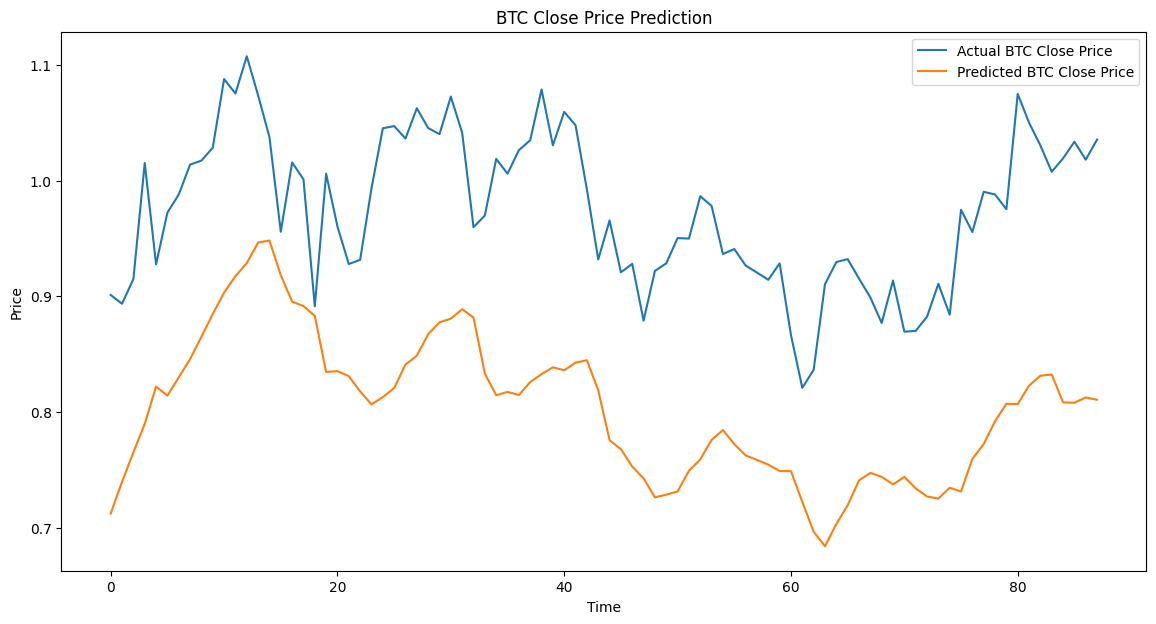

BTC - Predictions within 2%: 1 / 88
BTC - Predictions within 5%: 2 / 88
BTC - Predictions in correct direction: 34 / 87
Processing ETH...
Epoch 1/50
13/13 [==============================] - 7s 162ms/step - loss: 0.0317 - val_loss: 0.0019
Epoch 2/50
13/13 [==============================] - 1s 87ms/step - loss: 0.0063 - val_loss: 8.2979e-04
Epoch 3/50
13/13 [==============================] - 1s 83ms/step - loss: 0.0034 - val_loss: 0.0011
Epoch 4/50
13/13 [==============================] - 1s 114ms/step - loss: 0.0027 - val_loss: 8.1498e-04
Epoch 5/50
13/13 [==============================] - 2s 137ms/step - loss: 0.0022 - val_loss: 0.0010
Epoch 6/50
13/13 [==============================] - 2s 138ms/step - loss: 0.0021 - val_loss: 8.2810e-04
Epoch 7/50
13/13 [==============================] - 1s 114ms/step - loss: 0.0020 - val_loss: 8.3724e-04
Epoch 8/50
13/13 [==============================] - 1s 92ms/step - loss: 0.0019 - val_loss: 9.1395e-04
Epoch 9/50
13/13 [===========================

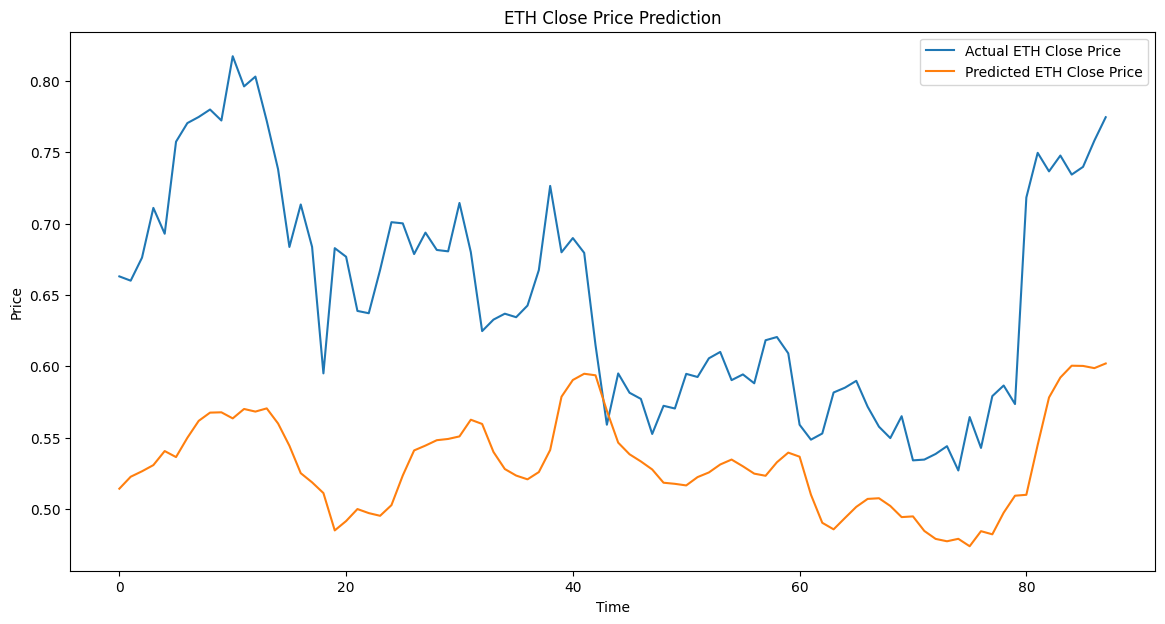

ETH - Predictions within 2%: 1 / 88
ETH - Predictions within 5%: 4 / 88
ETH - Predictions in correct direction: 38 / 87
Processing LTC...
Epoch 1/50
13/13 [==============================] - 7s 184ms/step - loss: 0.0134 - val_loss: 0.0052
Epoch 2/50
13/13 [==============================] - 1s 88ms/step - loss: 0.0038 - val_loss: 4.6314e-04
Epoch 3/50
13/13 [==============================] - 1s 117ms/step - loss: 0.0024 - val_loss: 3.6348e-04
Epoch 4/50
13/13 [==============================] - 2s 125ms/step - loss: 0.0019 - val_loss: 3.0025e-04
Epoch 5/50
13/13 [==============================] - 2s 135ms/step - loss: 0.0016 - val_loss: 4.9250e-04
Epoch 6/50
13/13 [==============================] - 1s 99ms/step - loss: 0.0016 - val_loss: 2.7033e-04
Epoch 7/50
13/13 [==============================] - 1s 77ms/step - loss: 0.0014 - val_loss: 2.8827e-04
Epoch 8/50
13/13 [==============================] - 1s 79ms/step - loss: 0.0014 - val_loss: 3.8443e-04
Epoch 9/50
13/13 [====================

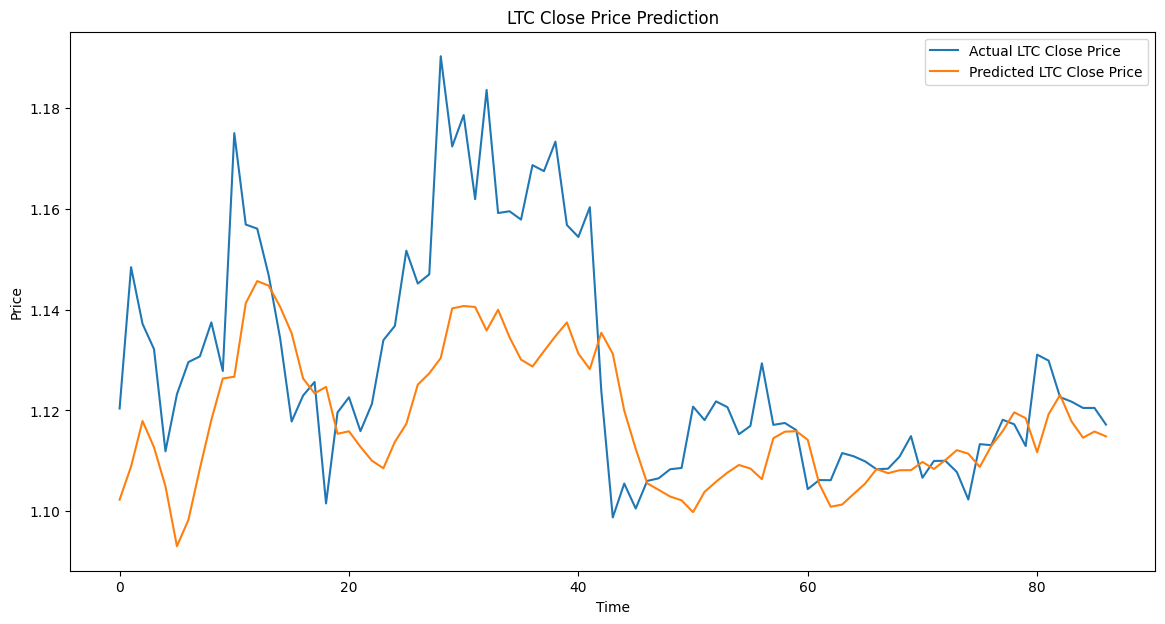

LTC - Predictions within 2%: 66 / 87
LTC - Predictions within 5%: 86 / 87
LTC - Predictions in correct direction: 37 / 86
Processing DOGE...
Epoch 1/50
13/13 [==============================] - 6s 186ms/step - loss: 0.0101 - val_loss: 0.0015
Epoch 2/50
13/13 [==============================] - 1s 115ms/step - loss: 0.0029 - val_loss: 0.0021
Epoch 3/50
13/13 [==============================] - 2s 129ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 4/50
13/13 [==============================] - 2s 136ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 5/50
13/13 [==============================] - 1s 103ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 6/50
13/13 [==============================] - 1s 84ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 7/50
13/13 [==============================] - 1s 84ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 8/50
13/13 [==============================] - 1s 85ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 9/50
13/13 [==============================] - 1s 85ms/st

3/3 [==============================] - 1s 20ms/step


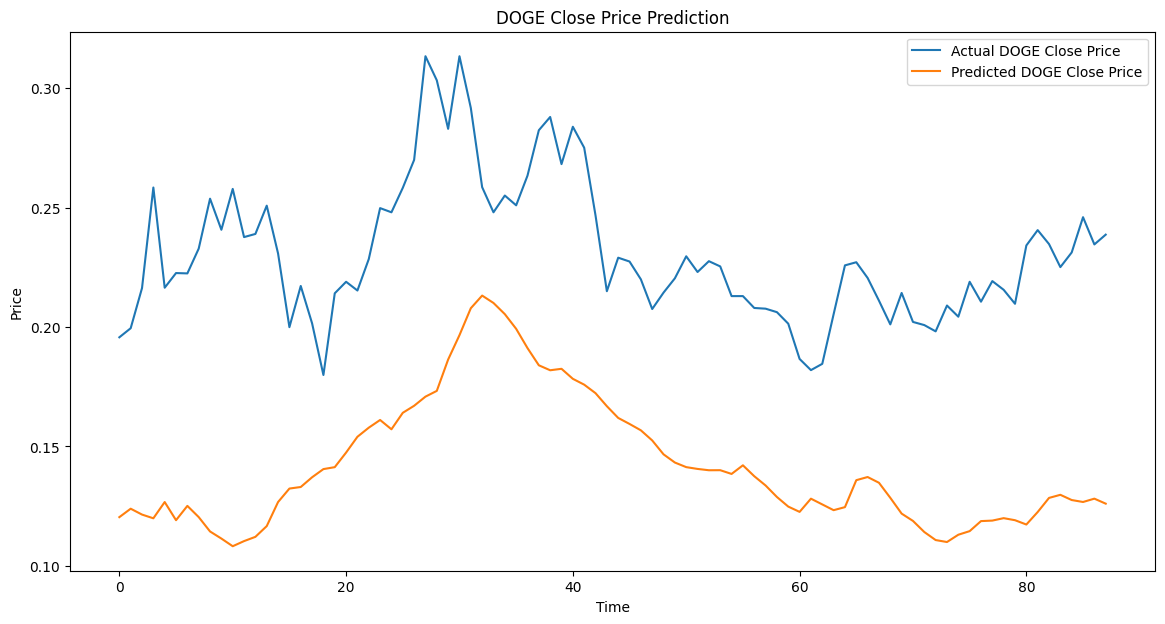

DOGE - Predictions within 2%: 0 / 88
DOGE - Predictions within 5%: 0 / 88
DOGE - Predictions in correct direction: 40 / 87


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Function to create sequences for LSTM
def create_sequences(data, seq_length=60, target_column='Close'):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length].values
        target = data.iloc[i + seq_length][target_column]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences, dtype=np.float32), np.array(targets, dtype=np.float32)

# Function to inverse transform the predictions and actual values
def inverse_transform(data, scaler, n_features):
    expanded_data = np.zeros((data.shape[0], n_features))
    expanded_data[:, -1] = data.flatten()
    return scaler.inverse_transform(expanded_data)[:, -1]

# Load your dataset
df = data

# Retain the original 'Coin' column
df['Coin_original'] = df['Coin']

# One-hot encode the 'Coin' column
df = pd.get_dummies(df, columns=['Coin'])

# Store the scalers
scalers = {}

# Loop through each coin for training and prediction
for coin in df['Coin_original'].unique():
    print(f"Processing {coin}...")

    # Filter data for the current coin from data
    coin_data_train = df[df['Coin_original'] == coin].copy()
    coin_data_train = coin_data_train.drop(columns=['Coin_original'])

    # Create and fit the scaler for the current coin
    scaler = MinMaxScaler()
    coin_data_train_scaled = scaler.fit_transform(coin_data_train)
    coin_data_train_scaled = pd.DataFrame(coin_data_train_scaled, columns=coin_data_train.columns)

    # Store the scaler
    scalers[coin] = scaler

    # Create sequences for training
    seq_length = 60
    sequences_train, targets_train = create_sequences(coin_data_train_scaled, seq_length)

    # Define and compile LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, sequences_train.shape[2])))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(sequences_train, targets_train, epochs=50, batch_size=64, validation_split=0.2)

    # Filter data for the current coin from new_data_cleaned
    coin_data_test = new_data_cleaned[new_data_cleaned['Coin_original'] == coin].copy()

    scaler = scalers[coin]

    coin_data_test = coin_data_test.drop(columns=['Coin_original'])

    coin_data_test = coin_data_test[scalers[coin].feature_names_in_]


    # Scale the data using the existing scaler
    coin_data_test_scaled = scalers[coin].transform(coin_data_test)

    # Create sequences for prediction
    sequences_test, targets_test = create_sequences(pd.DataFrame(coin_data_test_scaled, columns=coin_data_test.columns), seq_length)

    # Make predictions using the trained LSTM model
    y_pred = model.predict(sequences_test)

    # Inverse transform the predictions and actual values to their original scale
    n_features = coin_data_test.shape[1]
    y_test_inverse = inverse_transform(targets_test, scaler, n_features)
    y_pred_inverse = inverse_transform(y_pred, scaler, n_features)

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(y_test_inverse, label=f'Actual {coin} Close Price')
    plt.plot(y_pred_inverse, label=f'Predicted {coin} Close Price')
    plt.title(f'{coin} Close Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Calculate metrics
    within_2_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.02)
    within_5_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.05)
    correct_direction = np.sum(np.sign(y_pred_inverse[1:] - y_pred_inverse[:-1]) == np.sign(y_test_inverse[1:] - y_test_inverse[:-1]))

    total_predictions = len(y_test_inverse)
    print(f'{coin} - Predictions within 2%: {within_2_percent} / {total_predictions}')
    print(f'{coin} - Predictions within 5%: {within_5_percent} / {total_predictions}')
    print(f'{coin} - Predictions in correct direction: {correct_direction} / {total_predictions - 1}')


#GRU#

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Load your dataset
df = data
bitcoin_df = df[df['Coin'] == 'Bitcoin'].copy()
ethereum_df = df[df['Coin'] == 'Ethereum'].copy()

# Retain the original 'Coin' column
df['Coin_original'] = df['Coin']

# One-hot encode the 'Coin' column
df = pd.get_dummies(df, columns=['Coin'])

# Scale data for each coin separately
scalers = {}
for coin in df['Coin_original'].unique():
    scalers[coin] = MinMaxScaler()
    coin_data = df[df['Coin_original'] == coin]
    df.loc[df['Coin_original'] == coin, df.columns.difference(['Coin_original'])] = scalers[coin].fit_transform(coin_data[df.columns.difference(['Coin_original'])])

# Drop the 'Coin_original' column if not needed further
df = df.drop(columns=['Coin_original'])

# Create sequences for LSTM
def create_sequences(data, seq_length=60, target_column='Close'):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length].values
        target = data.iloc[i + seq_length][target_column]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences, dtype=np.float32), np.array(targets, dtype=np.float32)

sequences, targets = create_sequences(df)

# Ensure data types are correct
sequences = np.array(sequences, dtype=np.float32)
targets = np.array(targets, dtype=np.float32)

# Split data into training and testing sets
train_size = int(len(sequences) * 0.8)
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, shuffle=False)

# Define and compile GRU model
model = Sequential()
model.add(GRU(50, return_sequences=True, input_shape=(seq_length, sequences.shape[2])))
model.add(GRU(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


Epoch 1/50
55/55 [==============================] - 10s 114ms/step - loss: 0.0105 - val_loss: 0.0166
Epoch 2/50
55/55 [==============================] - 4s 71ms/step - loss: 0.0018 - val_loss: 0.0054
Epoch 3/50
55/55 [==============================] - 4s 77ms/step - loss: 0.0013 - val_loss: 7.5289e-04
Epoch 4/50
55/55 [==============================] - 6s 103ms/step - loss: 0.0012 - val_loss: 7.2563e-04
Epoch 5/50
55/55 [==============================] - 4s 72ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/50
55/55 [==============================] - 4s 72ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 7/50
55/55 [==============================] - 6s 114ms/step - loss: 0.0010 - val_loss: 2.3421e-04
Epoch 8/50
55/55 [==============================] - 4s 72ms/step - loss: 0.0010 - val_loss: 2.2479e-04
Epoch 9/50
55/55 [==============================] - 4s 71ms/step - loss: 9.6876e-04 - val_loss: 0.0011
Epoch 10/50
55/55 [==============================] - 5s 99ms/step - loss: 0.0012 - va

28/28 [==============================] - 1s 36ms/step
(865, 47)
(865, 47)


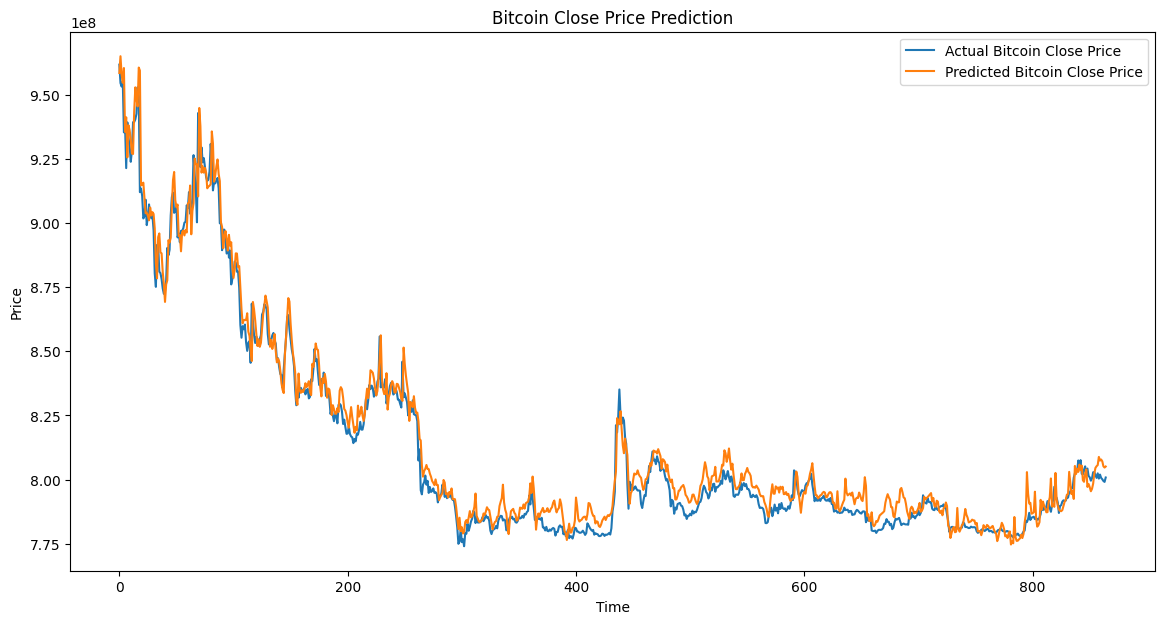

BTC - Predictions within 2%: 853 / 865
BTC - Predictions within 5%: 864 / 865
BTC - Predictions in correct direction: 425 / 864


In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to their original scale
def inverse_transform(data, scaler, n_features):
    expanded_data = np.zeros((data.shape[0], n_features))
    expanded_data[:, -1] = data.flatten()
    print(expanded_data.shape)
    return scaler.inverse_transform(expanded_data)[:, -1]

# Use the Bitcoin scaler for inverse transform
bitcoin_scaler = scalers['BTC']

n_features = bitcoin_scaler.min_.shape[0]


y_test_inverse = inverse_transform(y_test, bitcoin_scaler, n_features)
y_pred_inverse = inverse_transform(y_pred, bitcoin_scaler, n_features)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test_inverse, label='Actual Bitcoin Close Price')
plt.plot(y_pred_inverse, label='Predicted Bitcoin Close Price')
plt.title('Bitcoin Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate metrics
within_2_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.02)
within_5_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.05)
correct_direction = np.sum(np.sign(y_pred_inverse[1:] - y_pred_inverse[:-1]) == np.sign(y_test_inverse[1:] - y_test_inverse[:-1]))

total_predictions = len(y_test_inverse)
print(f'{coin} - Predictions within 2%: {within_2_percent} / {total_predictions}')
print(f'{coin} - Predictions within 5%: {within_5_percent} / {total_predictions}')
print(f'{coin} - Predictions in correct direction: {correct_direction} / {total_predictions - 1}')

Processing BTC...
3/3 [==============================] - 0s 14ms/step


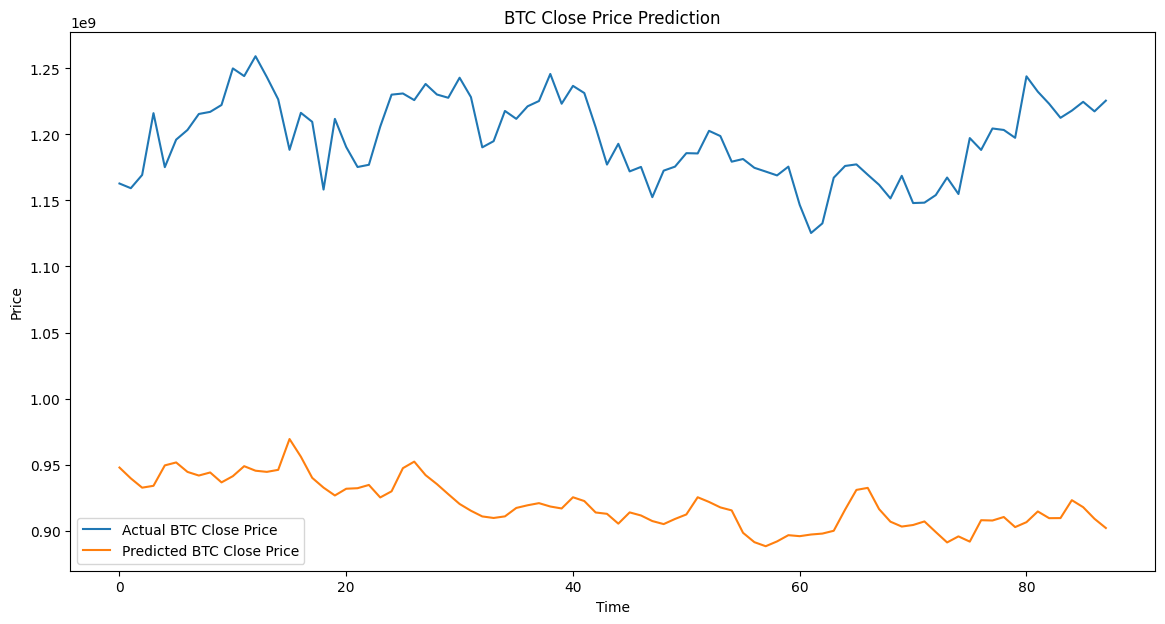

BTC - Predictions within 2%: 0 / 88
BTC - Predictions within 5%: 0 / 88
BTC - Predictions in correct direction: 44 / 87
Processing ETH...
3/3 [==============================] - 0s 23ms/step


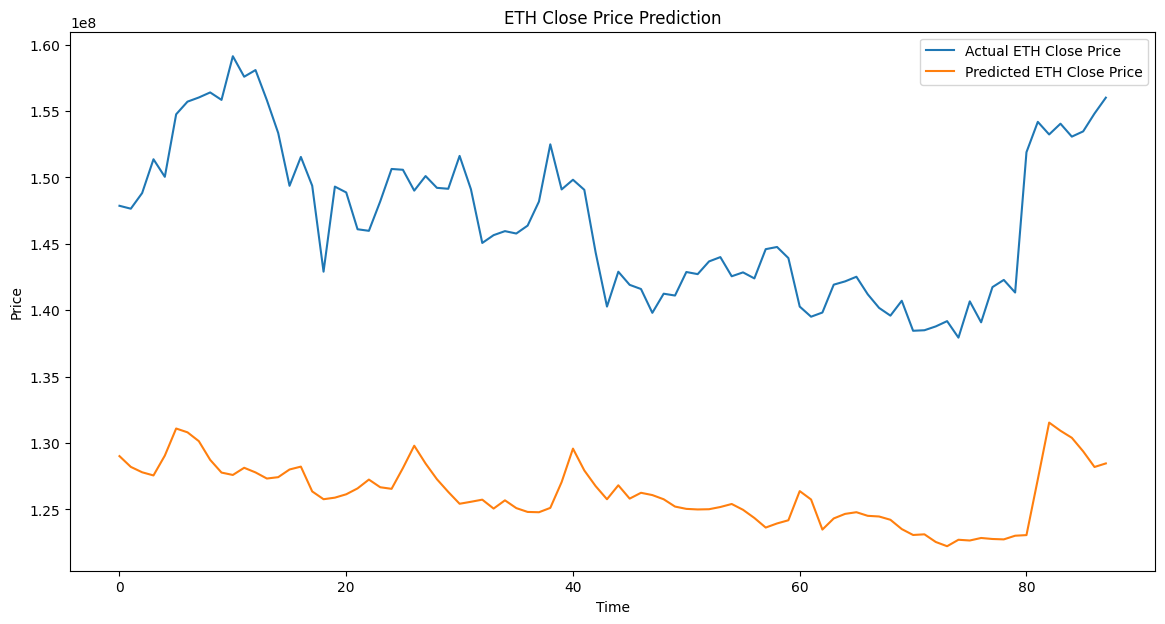

ETH - Predictions within 2%: 0 / 88
ETH - Predictions within 5%: 0 / 88
ETH - Predictions in correct direction: 39 / 87
Processing LTC...
3/3 [==============================] - 0s 22ms/step


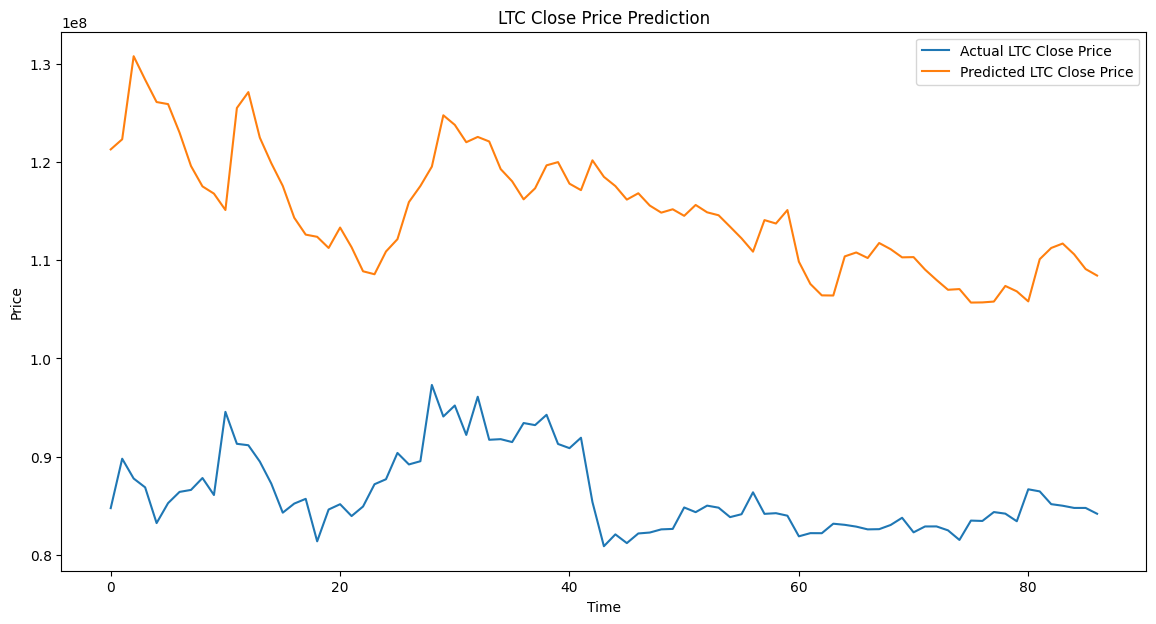

LTC - Predictions within 2%: 0 / 87
LTC - Predictions within 5%: 0 / 87
LTC - Predictions in correct direction: 35 / 86
Processing DOGE...
3/3 [==============================] - 0s 24ms/step


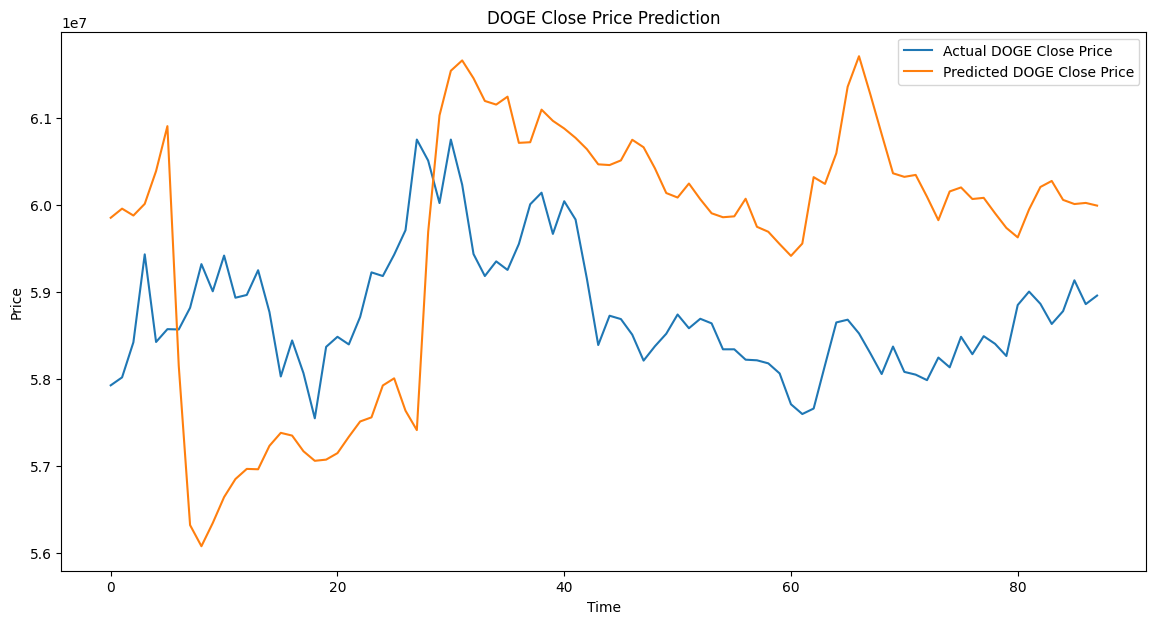

DOGE - Predictions within 2%: 20 / 88
DOGE - Predictions within 5%: 84 / 88
DOGE - Predictions in correct direction: 42 / 87


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Function to create sequences for LSTM
def create_sequences(data, seq_length=60, target_column='Close'):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length].values
        target = data.iloc[i + seq_length][target_column]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences, dtype=np.float32), np.array(targets, dtype=np.float32)

# Function to inverse transform the predictions and actual values
def inverse_transform(data, scaler, n_features):
    expanded_data = np.zeros((data.shape[0], n_features))
    expanded_data[:, -1] = data.flatten()
    return scaler.inverse_transform(expanded_data)[:, -1]


# List of coins to process
coins = ['BTC', 'ETH', 'LTC', 'DOGE']

# Loop through each coin
for coin in coins:
    print(f"Processing {coin}...")

    # Filter data for the current coin
    coin_data = new_data_cleaned[new_data_cleaned['Coin_original'] == coin]

    # Assuming scalers are already created and stored in a dictionary named 'scalers'
    scaler = scalers[coin]

    coin_data = coin_data.drop(columns=['Coin_original'])

    coin_data = coin_data[scalers[coin].feature_names_in_]


    # Scale the data using the existing scaler
    coin_data_scaled = scaler.transform(coin_data)

    # Create sequences
    seq_length = 60
    sequences, targets = create_sequences(pd.DataFrame(coin_data_scaled, columns=coin_data.columns), seq_length)

    # Make predictions using the pre-trained model
    y_pred = model.predict(sequences)

    # Inverse transform the predictions and actual values to their original scale
    n_features = coin_data.shape[1]
    y_test_inverse = inverse_transform(targets, scaler, n_features)
    y_pred_inverse = inverse_transform(y_pred, scaler, n_features)

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(y_test_inverse, label=f'Actual {coin} Close Price')
    plt.plot(y_pred_inverse, label=f'Predicted {coin} Close Price')
    plt.title(f'{coin} Close Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Calculate metrics
    within_2_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.02)
    within_5_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.05)
    correct_direction = np.sum(np.sign(y_pred_inverse[1:] - y_pred_inverse[:-1]) == np.sign(y_test_inverse[1:] - y_test_inverse[:-1]))

    total_predictions = len(y_test_inverse)
    print(f'{coin} - Predictions within 2%: {within_2_percent} / {total_predictions}')
    print(f'{coin} - Predictions within 5%: {within_5_percent} / {total_predictions}')
    print(f'{coin} - Predictions in correct direction: {correct_direction} / {total_predictions - 1}')


GRU for each coin

Processing BTC...
Epoch 1/50
13/13 [==============================] - 6s 136ms/step - loss: 0.1201 - val_loss: 0.0438
Epoch 2/50
13/13 [==============================] - 1s 74ms/step - loss: 0.0224 - val_loss: 0.0054
Epoch 3/50
13/13 [==============================] - 1s 76ms/step - loss: 0.0074 - val_loss: 0.0131
Epoch 4/50
13/13 [==============================] - 1s 74ms/step - loss: 0.0033 - val_loss: 0.0043
Epoch 5/50
13/13 [==============================] - 1s 74ms/step - loss: 0.0023 - val_loss: 0.0037
Epoch 6/50
13/13 [==============================] - 1s 73ms/step - loss: 0.0018 - val_loss: 0.0041
Epoch 7/50
13/13 [==============================] - 1s 88ms/step - loss: 0.0016 - val_loss: 0.0033
Epoch 8/50
13/13 [==============================] - 2s 122ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 9/50
13/13 [==============================] - 2s 122ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 10/50
13/13 [==============================] - 2s 123ms/step - loss: 0.0013 - val_

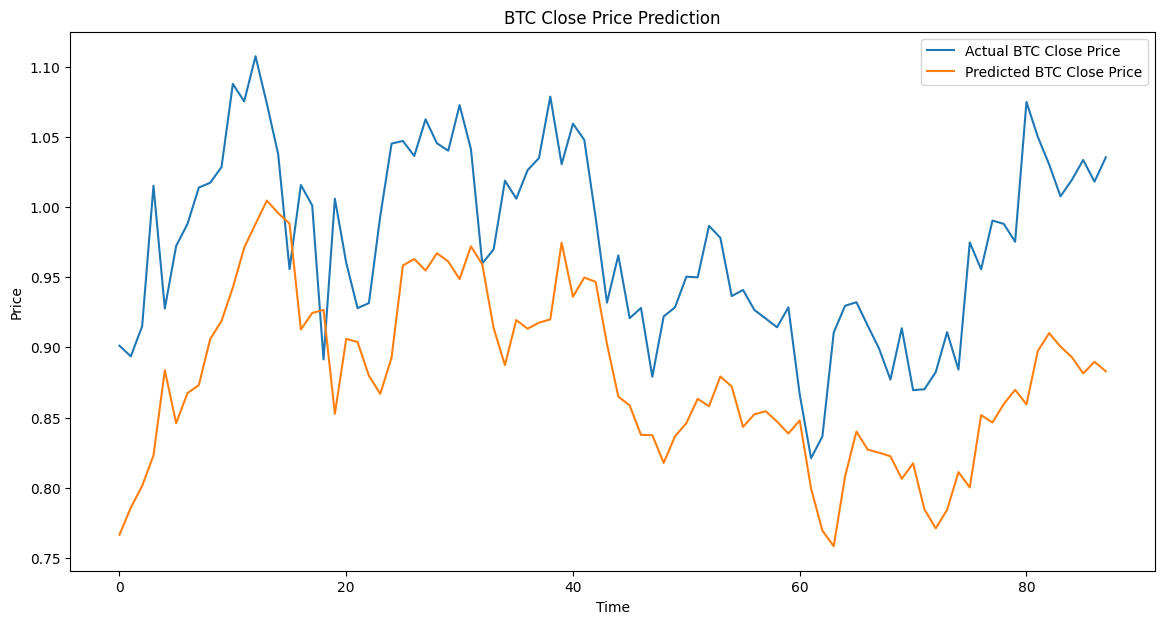

BTC - Predictions within 2%: 1 / 88
BTC - Predictions within 5%: 11 / 88
BTC - Predictions in correct direction: 33 / 87
Processing ETH...
Epoch 1/50
13/13 [==============================] - 5s 138ms/step - loss: 0.0120 - val_loss: 0.0036
Epoch 2/50
13/13 [==============================] - 1s 75ms/step - loss: 0.0035 - val_loss: 8.9727e-04
Epoch 3/50
13/13 [==============================] - 1s 75ms/step - loss: 0.0019 - val_loss: 3.6959e-04
Epoch 4/50
13/13 [==============================] - 1s 77ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 5/50
13/13 [==============================] - 1s 77ms/step - loss: 0.0015 - val_loss: 7.4489e-04
Epoch 6/50
13/13 [==============================] - 2s 125ms/step - loss: 0.0014 - val_loss: 4.1853e-04
Epoch 7/50
13/13 [==============================] - 2s 124ms/step - loss: 0.0012 - val_loss: 2.3507e-04
Epoch 8/50
13/13 [==============================] - 2s 123ms/step - loss: 0.0011 - val_loss: 5.4306e-04
Epoch 9/50
13/13 [=======================

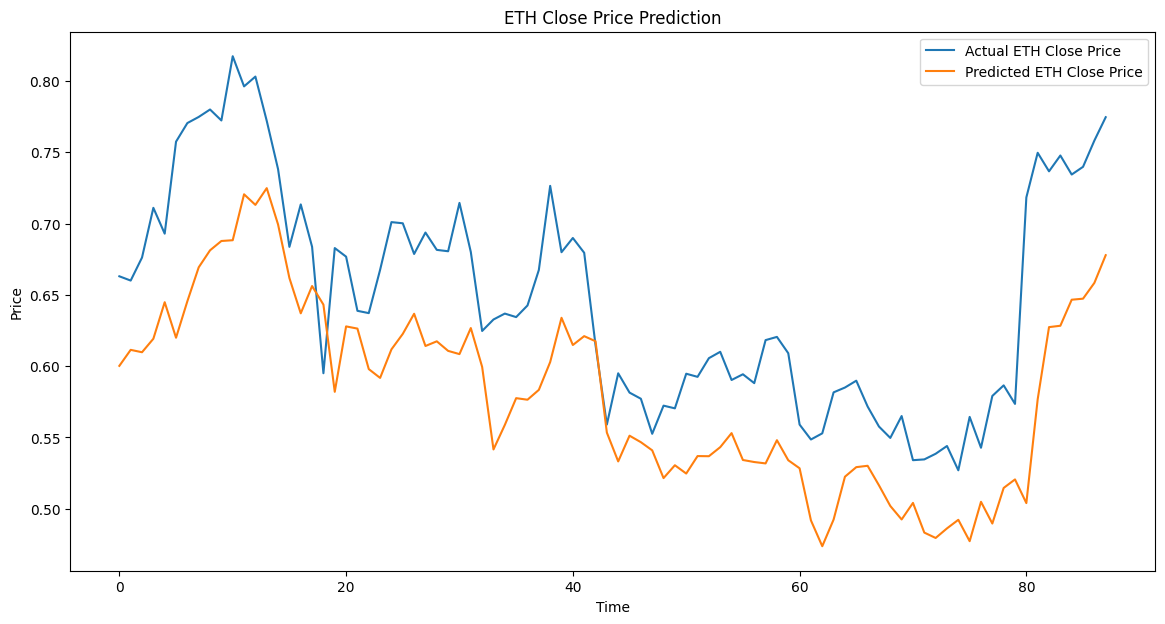

ETH - Predictions within 2%: 3 / 88
ETH - Predictions within 5%: 7 / 88
ETH - Predictions in correct direction: 38 / 87
Processing LTC...
Epoch 1/50
13/13 [==============================] - 5s 141ms/step - loss: 0.0189 - val_loss: 0.0050
Epoch 2/50
13/13 [==============================] - 1s 78ms/step - loss: 0.0047 - val_loss: 0.0013
Epoch 3/50
13/13 [==============================] - 1s 77ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 4/50
13/13 [==============================] - 2s 124ms/step - loss: 0.0018 - val_loss: 0.0034
Epoch 5/50
13/13 [==============================] - 2s 123ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 6/50
13/13 [==============================] - 2s 127ms/step - loss: 0.0011 - val_loss: 8.9562e-04
Epoch 7/50
13/13 [==============================] - 1s 86ms/step - loss: 9.9970e-04 - val_loss: 6.9006e-04
Epoch 8/50
13/13 [==============================] - 1s 76ms/step - loss: 9.9412e-04 - val_loss: 0.0014
Epoch 9/50
13/13 [==============================] 

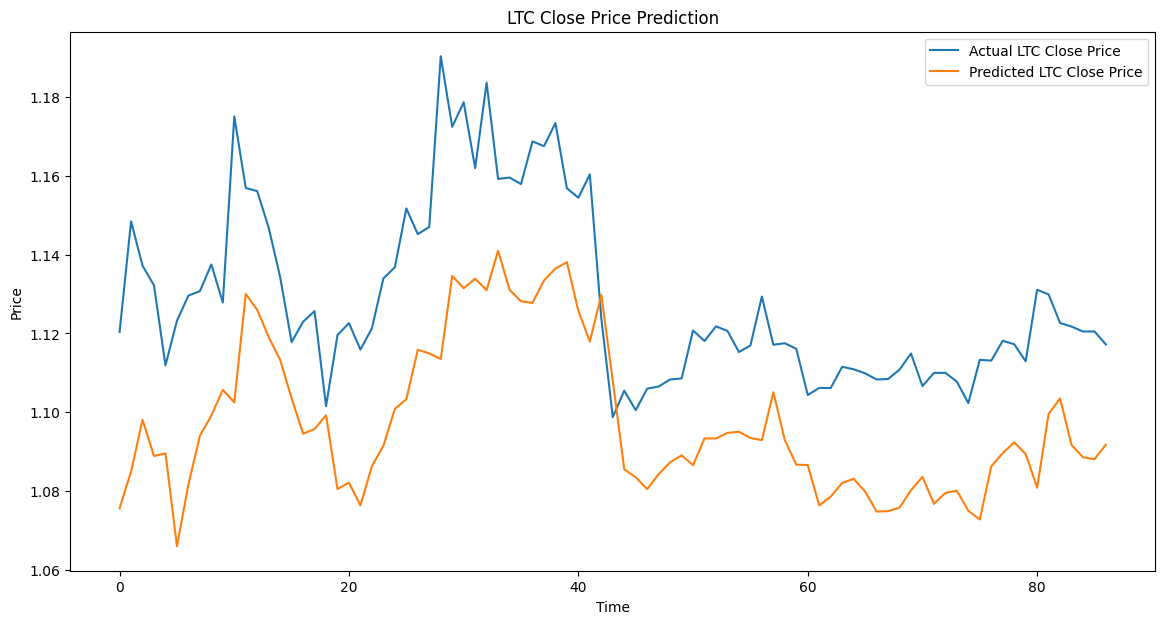

LTC - Predictions within 2%: 16 / 87
LTC - Predictions within 5%: 83 / 87
LTC - Predictions in correct direction: 38 / 86
Processing DOGE...
Epoch 1/50
13/13 [==============================] - 5s 138ms/step - loss: 0.0097 - val_loss: 0.0017
Epoch 2/50
13/13 [==============================] - 1s 76ms/step - loss: 0.0027 - val_loss: 6.8916e-04
Epoch 3/50
13/13 [==============================] - 1s 96ms/step - loss: 0.0016 - val_loss: 6.6399e-04
Epoch 4/50
13/13 [==============================] - 2s 121ms/step - loss: 0.0013 - val_loss: 7.8251e-04
Epoch 5/50
13/13 [==============================] - 2s 118ms/step - loss: 0.0012 - val_loss: 7.8799e-04
Epoch 6/50
13/13 [==============================] - 2s 120ms/step - loss: 0.0011 - val_loss: 4.5960e-04
Epoch 7/50
13/13 [==============================] - 1s 77ms/step - loss: 9.7818e-04 - val_loss: 7.3875e-04
Epoch 8/50
13/13 [==============================] - 1s 76ms/step - loss: 9.6093e-04 - val_loss: 4.4757e-04
Epoch 9/50
13/13 [=========

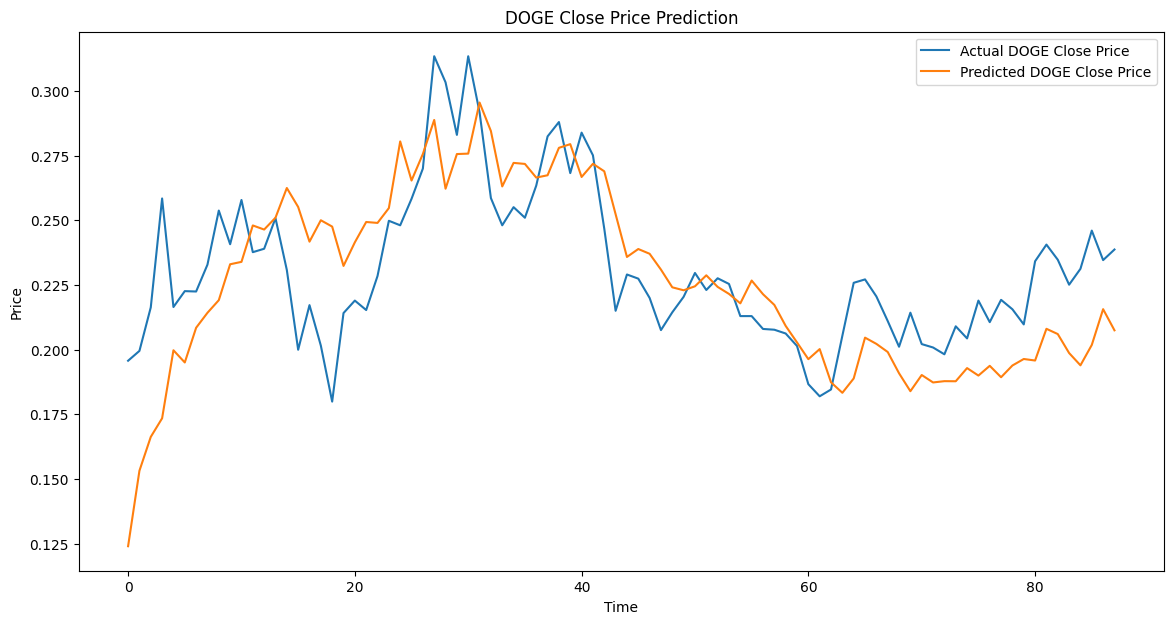

DOGE - Predictions within 2%: 11 / 88
DOGE - Predictions within 5%: 25 / 88
DOGE - Predictions in correct direction: 43 / 87


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

# Function to create sequences for LSTM
def create_sequences(data, seq_length=60, target_column='Close'):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length].values
        target = data.iloc[i + seq_length][target_column]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences, dtype=np.float32), np.array(targets, dtype=np.float32)

# Function to inverse transform the predictions and actual values
def inverse_transform(data, scaler, n_features):
    expanded_data = np.zeros((data.shape[0], n_features))
    expanded_data[:, -1] = data.flatten()
    return scaler.inverse_transform(expanded_data)[:, -1]

# Load your dataset
df = data

# Retain the original 'Coin' column
df['Coin_original'] = df['Coin']

# One-hot encode the 'Coin' column
df = pd.get_dummies(df, columns=['Coin'])

# Store the scalers
scalers = {}

# Loop through each coin for training and prediction
for coin in df['Coin_original'].unique():
    print(f"Processing {coin}...")

    # Filter data for the current coin from data
    coin_data_train = df[df['Coin_original'] == coin].copy()
    coin_data_train = coin_data_train.drop(columns=['Coin_original'])

    # Create and fit the scaler for the current coin
    scaler = MinMaxScaler()
    coin_data_train_scaled = scaler.fit_transform(coin_data_train)
    coin_data_train_scaled = pd.DataFrame(coin_data_train_scaled, columns=coin_data_train.columns)

    # Store the scaler
    scalers[coin] = scaler

    # Create sequences for training
    seq_length = 60
    sequences_train, targets_train = create_sequences(coin_data_train_scaled, seq_length)

    # Define and compile LSTM model
    model = Sequential()
    model.add(GRU(50, return_sequences=True, input_shape=(seq_length, sequences_train.shape[2])))
    model.add(GRU(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(sequences_train, targets_train, epochs=50, batch_size=64, validation_split=0.2)

    # Filter data for the current coin from new_data_cleaned
    coin_data_test = new_data_cleaned[new_data_cleaned['Coin_original'] == coin].copy()

    scaler = scalers[coin]

    coin_data_test = coin_data_test.drop(columns=['Coin_original'])

    coin_data_test = coin_data_test[scalers[coin].feature_names_in_]


    # Scale the data using the existing scaler
    coin_data_test_scaled = scalers[coin].transform(coin_data_test)

    # Create sequences for prediction
    sequences_test, targets_test = create_sequences(pd.DataFrame(coin_data_test_scaled, columns=coin_data_test.columns), seq_length)

    # Make predictions using the trained LSTM model
    y_pred = model.predict(sequences_test)

    # Inverse transform the predictions and actual values to their original scale
    n_features = coin_data_test.shape[1]
    y_test_inverse = inverse_transform(targets_test, scaler, n_features)
    y_pred_inverse = inverse_transform(y_pred, scaler, n_features)

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(y_test_inverse, label=f'Actual {coin} Close Price')
    plt.plot(y_pred_inverse, label=f'Predicted {coin} Close Price')
    plt.title(f'{coin} Close Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Calculate metrics
    within_2_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.02)
    within_5_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.05)
    correct_direction = np.sum(np.sign(y_pred_inverse[1:] - y_pred_inverse[:-1]) == np.sign(y_test_inverse[1:] - y_test_inverse[:-1]))

    total_predictions = len(y_test_inverse)
    print(f'{coin} - Predictions within 2%: {within_2_percent} / {total_predictions}')
    print(f'{coin} - Predictions within 5%: {within_5_percent} / {total_predictions}')
    print(f'{coin} - Predictions in correct direction: {correct_direction} / {total_predictions - 1}')


#SVM#

Processing BTC...


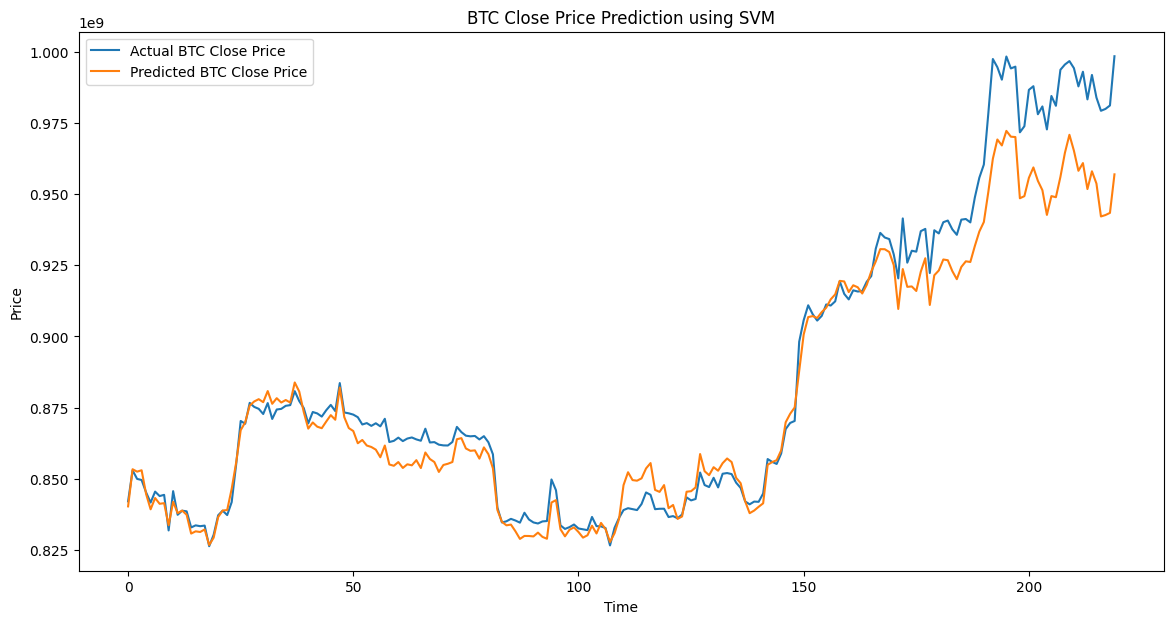

BTC - Predictions within 2%: 190 / 220
BTC - Predictions within 5%: 220 / 220
BTC - Predictions in correct direction: 181 / 219
Processing ETH...


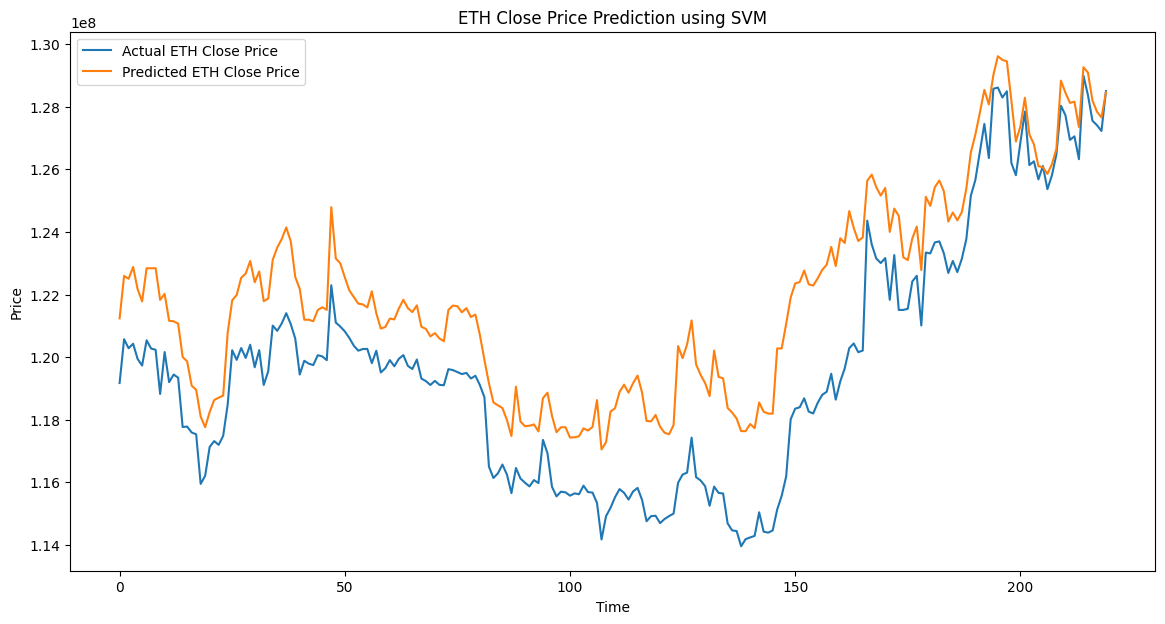

ETH - Predictions within 2%: 141 / 220
ETH - Predictions within 5%: 220 / 220
ETH - Predictions in correct direction: 179 / 219
Processing LTC...


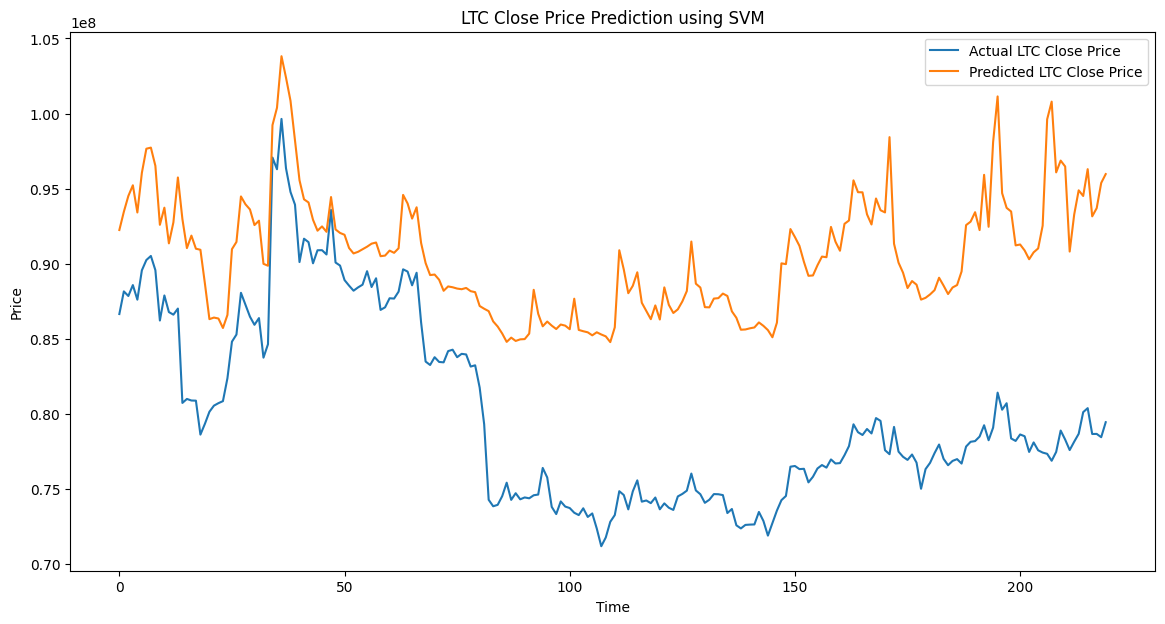

LTC - Predictions within 2%: 5 / 220
LTC - Predictions within 5%: 28 / 220
LTC - Predictions in correct direction: 163 / 219
Processing DOGE...


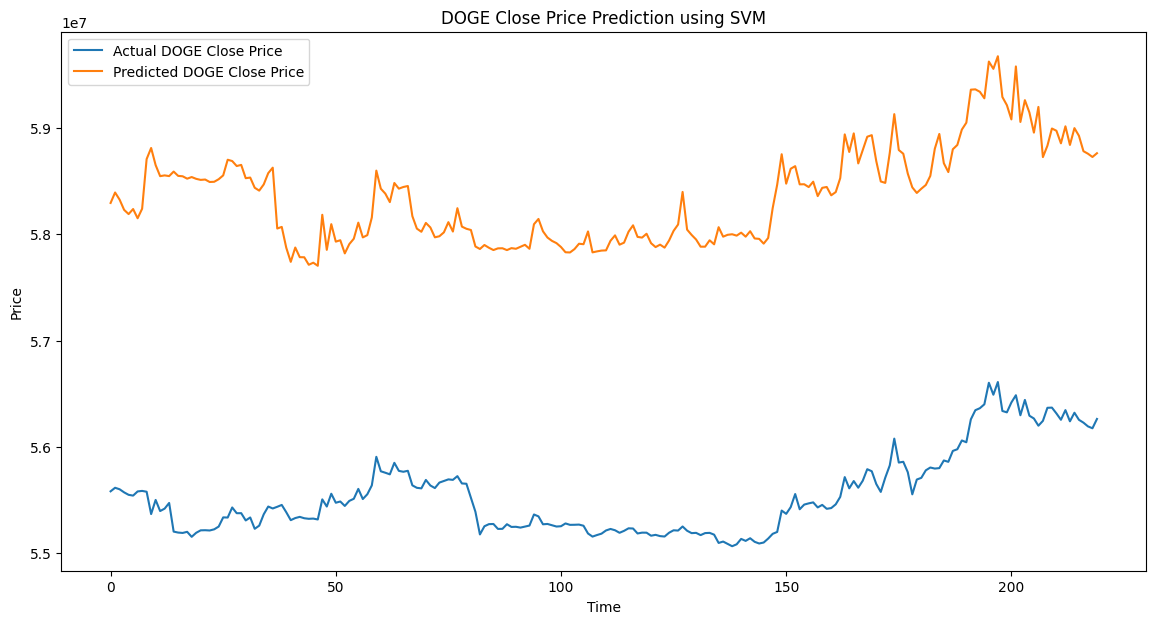

DOGE - Predictions within 2%: 0 / 220
DOGE - Predictions within 5%: 115 / 220
DOGE - Predictions in correct direction: 159 / 219


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# Function to inverse transform the predictions and actual values
def inverse_transform(data, scaler, n_features):
    expanded_data = np.zeros((data.shape[0], n_features))
    expanded_data[:, -1] = data.flatten()
    return scaler.inverse_transform(expanded_data)[:, -1]

# Load your dataset
df = data  # Replace with your actual data loading process

# Retain the original 'Coin' column
df['Coin_original'] = df['Coin']

# One-hot encode the 'Coin' column
df = pd.get_dummies(df, columns=['Coin'])

# Scale data for each coin separately
scalers = {}
for coin in df['Coin_original'].unique():
    scalers[coin] = MinMaxScaler()
    coin_data = df[df['Coin_original'] == coin]
    df.loc[df['Coin_original'] == coin, df.columns.difference(['Coin_original'])] = scalers[coin].fit_transform(coin_data[df.columns.difference(['Coin_original'])])

# List of coins to process
coins = df['Coin_original'].unique()

# Loop through each coin for training and prediction
for coin in coins:
    print(f"Processing {coin}...")

    # Filter for the current coin data
    coin_df = df[df['Coin_original'] == coin].copy()

    # Drop columns that won't be used for SVM
    coin_df = coin_df.drop(columns=['Coin_original'])

    # Create features and target
    X = coin_df.drop(columns=['Close']).values
    y = coin_df['Close'].values

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Build and train SVM model
    svm_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svm_model.fit(X_train, y_train)

    # Make predictions
    y_pred = svm_model.predict(X_test)

    # Inverse transform the predictions and actual values to their original scale
    coin_scaler = scalers[coin]

    # Ensure we inverse transform correctly
    n_features = coin_df.shape[1]

    # Transform the actual and predicted values
    y_test_expanded = inverse_transform(y_test.reshape(-1, 1), coin_scaler, n_features)
    y_pred_expanded = inverse_transform(y_pred.reshape(-1, 1), coin_scaler, n_features)

    # Extract only the close prices from the expanded data
    y_test_inverse = y_test_expanded
    y_pred_inverse = y_pred_expanded

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(y_test_inverse, label=f'Actual {coin} Close Price')
    plt.plot(y_pred_inverse, label=f'Predicted {coin} Close Price')
    plt.title(f'{coin} Close Price Prediction using SVM')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Calculate metrics
    within_2_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.02)
    within_5_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.05)
    correct_direction = np.sum(np.sign(y_pred_inverse[1:] - y_pred_inverse[:-1]) == np.sign(y_test_inverse[1:] - y_test_inverse[:-1]))

    total_predictions = len(y_test_inverse)
    print(f'{coin} - Predictions within 2%: {within_2_percent} / {total_predictions}')
    print(f'{coin} - Predictions within 5%: {within_5_percent} / {total_predictions}')
    print(f'{coin} - Predictions in correct direction: {correct_direction} / {total_predictions - 1}')


Processing BTC...


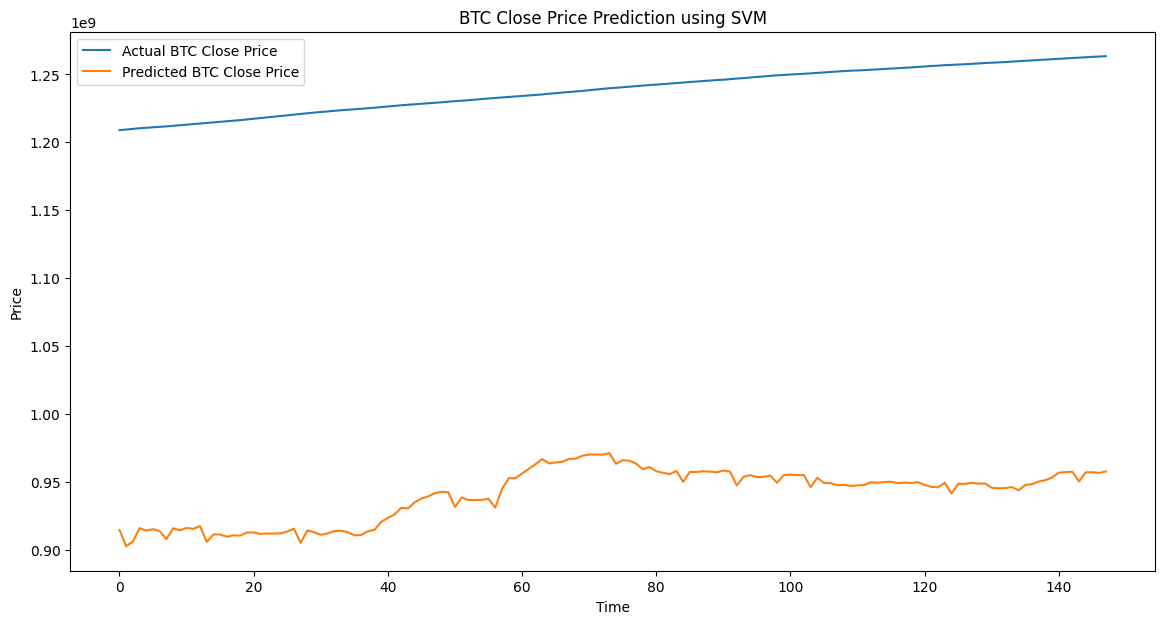

BTC - Predictions within 2%: 0 / 148
BTC - Predictions within 5%: 0 / 148
BTC - Predictions in correct direction: 87 / 147
Processing ETH...


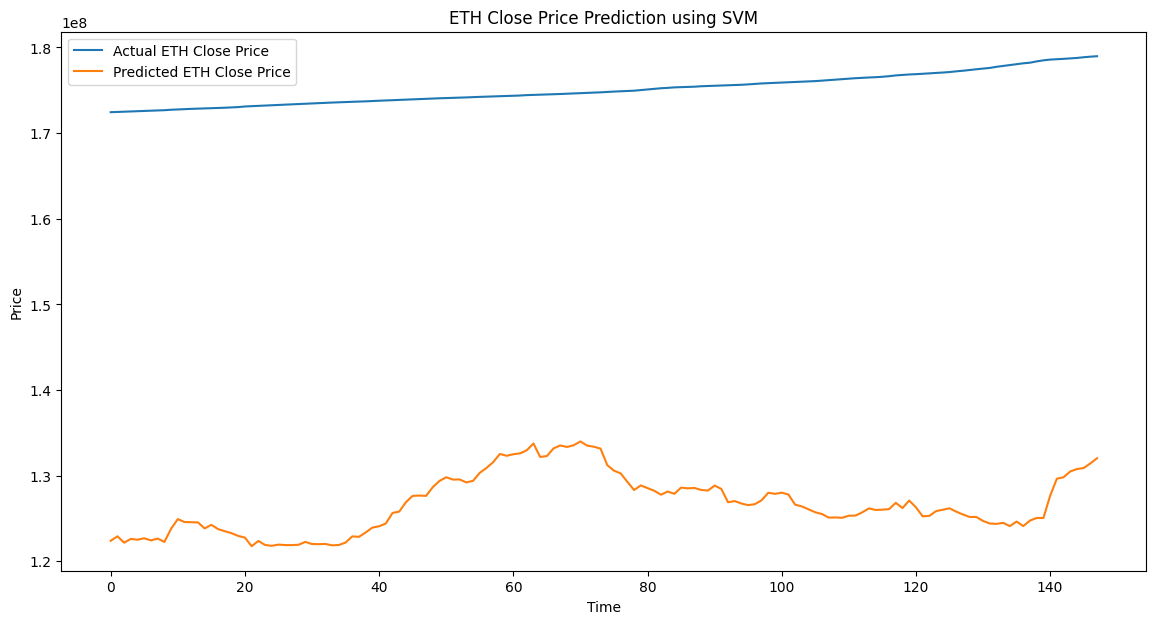

ETH - Predictions within 2%: 0 / 148
ETH - Predictions within 5%: 0 / 148
ETH - Predictions in correct direction: 77 / 147
Processing LTC...


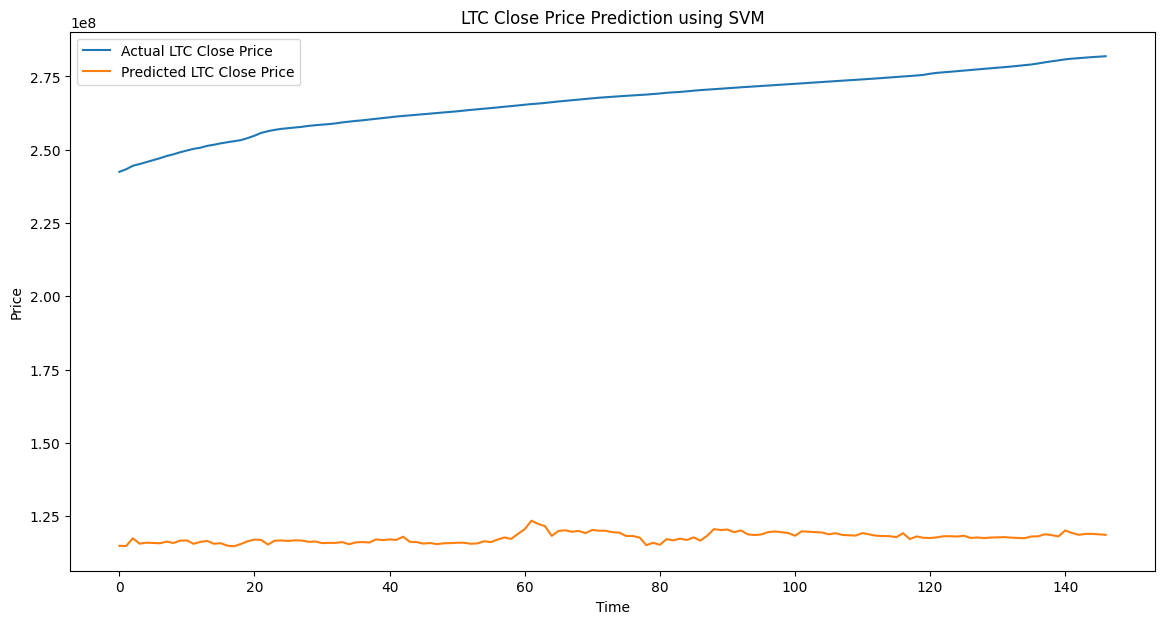

LTC - Predictions within 2%: 0 / 147
LTC - Predictions within 5%: 0 / 147
LTC - Predictions in correct direction: 68 / 146
Processing DOGE...


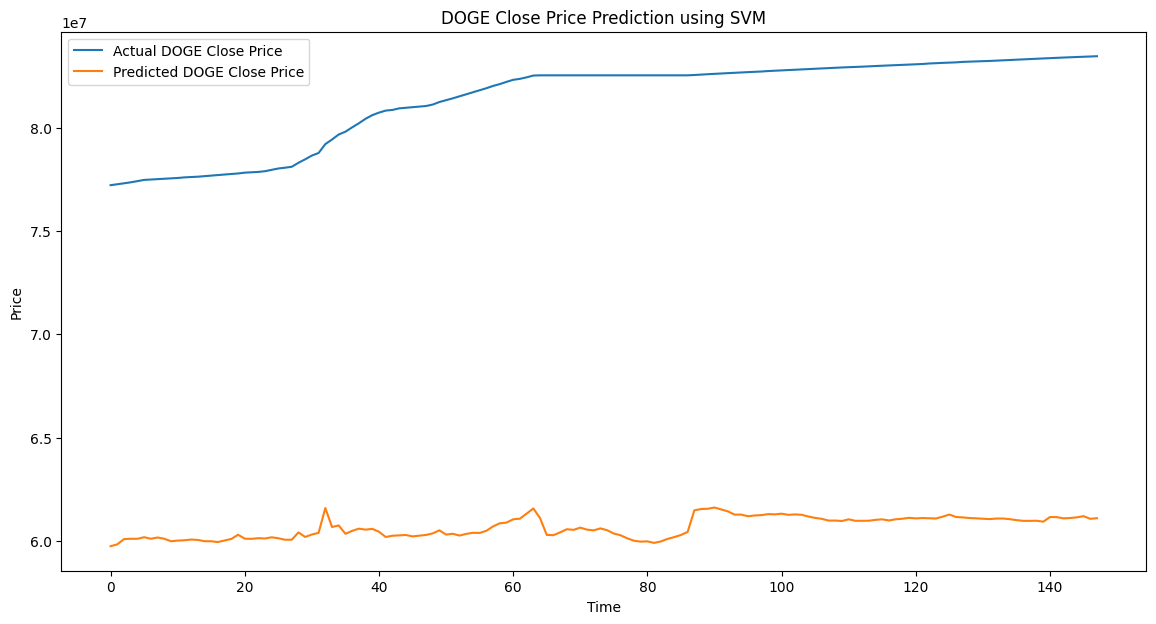

DOGE - Predictions within 2%: 0 / 148
DOGE - Predictions within 5%: 0 / 148
DOGE - Predictions in correct direction: 68 / 147


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Function to inverse transform the predictions and actual values
def inverse_transform(data, scaler, n_features):
    expanded_data = np.zeros((data.shape[0], n_features))
    expanded_data[:, -1] = data.flatten()
    return scaler.inverse_transform(expanded_data)[:, -1]

# Load your dataset
df = data  # Replace with your actual data loading process
new_data_cleaned = new_data_cleaned  # Ensure new_data_cleaned is properly loaded

# Retain the original 'Coin' column
df['Coin_original'] = df['Coin']

# One-hot encode the 'Coin' column
df = pd.get_dummies(df, columns=['Coin'])

# Scale data for each coin separately
scalers = {}
for coin in df['Coin_original'].unique():
    scalers[coin] = MinMaxScaler()
    coin_data = df[df['Coin_original'] == coin]
    df.loc[df['Coin_original'] == coin, df.columns.difference(['Coin_original'])] = scalers[coin].fit_transform(coin_data[df.columns.difference(['Coin_original'])])

# List of coins to process
coins = df['Coin_original'].unique()

# Loop through each coin for training and prediction
for coin in coins:
    print(f"Processing {coin}...")

    # Filter for the current coin data for training
    coin_data_train = df[df['Coin_original'] == coin].copy()
    coin_data_train = coin_data_train.drop(columns=['Coin_original'])

    # Create features and target for training
    X_train = coin_data_train.drop(columns=['Close']).values
    y_train = coin_data_train['Close'].values

    # Define and train SVM model
    svm_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
    svm_model.fit(X_train, y_train)

    # Filter for the current coin data for testing
    coin_data_test = new_data_cleaned[new_data_cleaned['Coin_original'] == coin].copy()
    coin_data_test = coin_data_test.drop(columns=['Coin_original'])

    # Scale the data using the existing scaler
    coin_data_test = coin_data_test[scalers[coin].feature_names_in_]
    coin_data_test_scaled = scalers[coin].transform(coin_data_test)
    X_test = coin_data_test_scaled[:, :-1]
    y_test = coin_data_test_scaled[:, -1]

    # Make predictions using the trained SVM model
    y_pred = svm_model.predict(X_test)

    # Inverse transform the predictions and actual values to their original scale
    n_features = coin_data_test.shape[1]
    y_test_inverse = inverse_transform(y_test.reshape(-1, 1), scalers[coin], n_features)
    y_pred_inverse = inverse_transform(y_pred.reshape(-1, 1), scalers[coin], n_features)

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(y_test_inverse, label=f'Actual {coin} Close Price')
    plt.plot(y_pred_inverse, label=f'Predicted {coin} Close Price')
    plt.title(f'{coin} Close Price Prediction using SVM')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Calculate metrics
    within_2_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.02)
    within_5_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.05)
    correct_direction = np.sum(np.sign(y_pred_inverse[1:] - y_pred_inverse[:-1]) == np.sign(y_test_inverse[1:] - y_test_inverse[:-1]))

    total_predictions = len(y_test_inverse)
    print(f'{coin} - Predictions within 2%: {within_2_percent} / {total_predictions}')
    print(f'{coin} - Predictions within 5%: {within_5_percent} / {total_predictions}')
    print(f'{coin} - Predictions in correct direction: {correct_direction} / {total_predictions - 1}')


NEWS SENTIMENT

In [ ]:
news = pd.read_csv('/content/drive/MyDrive/narxoz/news_with_sentiments.csv')

In [ ]:
data.reset_index(inplace=True)

news['newsDatetime'] = pd.to_datetime(news['newsDatetime']).dt.date
data['Date'] = pd.to_datetime(data['Date']).dt.date

# Aggregate news data to keep only the first news entry per day and currency
aggregated_news = news.drop_duplicates(subset=['newsDatetime', 'currency name'], keep='first')

# Merge DataFrames
merged_df = data.merge(aggregated_news, how='left', left_on=['Date', 'Coin'], right_on=['newsDatetime', 'currency name'])

# Handle missing values
merged_df['sentiment'] = merged_df['sentiment'].fillna('neutral')
merged_df['score'] = merged_df['score'].fillna(0)

# Drop redundant columns
merged_df = merged_df.drop(columns=['newsDatetime', 'currency name', "title"])

merged_df.set_index('Date', inplace=True)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load your dataset
df = merged_df
bitcoin_df = df[df['Coin'] == 'Bitcoin'].copy()
ethereum_df = df[df['Coin'] == 'Ethereum'].copy()

# One-hot encode the 'Coin' column
df = pd.get_dummies(df, columns=['Coin', 'sentiment'])

# Scale data for each coin separately
scalers = {}
for coin in df['Coin_original'].unique():
    scalers[coin] = MinMaxScaler()
    coin_data = df[df['Coin_original'] == coin]
    df.loc[df['Coin_original'] == coin, df.columns.difference(['Coin_original'])] = scalers[coin].fit_transform(coin_data[df.columns.difference(['Coin_original'])])

# Drop the 'Coin_original' column if not needed further
df = df.drop(columns=['Coin_original'])

# Create sequences for LSTM
def create_sequences(data, seq_length=60, target_column='Close'):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length].values
        target = data.iloc[i + seq_length][target_column]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences, dtype=np.float32), np.array(targets, dtype=np.float32)

sequences, targets = create_sequences(df)

# Ensure data types are correct
sequences = np.array(sequences, dtype=np.float32)
targets = np.array(targets, dtype=np.float32)

# Split data into training and testing sets
train_size = int(len(sequences) * 0.8)
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, shuffle=False)

# Build and compile LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


Epoch 1/50
55/55 [==============================] - 10s 124ms/step - loss: 0.0099 - val_loss: 0.0023
Epoch 2/50
55/55 [==============================] - 4s 71ms/step - loss: 0.0025 - val_loss: 0.0030
Epoch 3/50
55/55 [==============================] - 4s 70ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 4/50
55/55 [==============================] - 6s 104ms/step - loss: 0.0017 - val_loss: 9.9794e-04
Epoch 5/50
55/55 [==============================] - 4s 79ms/step - loss: 0.0016 - val_loss: 3.7058e-04
Epoch 6/50
55/55 [==============================] - 4s 71ms/step - loss: 0.0014 - val_loss: 3.3198e-04
Epoch 7/50
55/55 [==============================] - 5s 87ms/step - loss: 0.0015 - val_loss: 4.9444e-04
Epoch 8/50
55/55 [==============================] - 5s 94ms/step - loss: 0.0014 - val_loss: 5.0170e-04
Epoch 9/50
55/55 [==============================] - 4s 71ms/step - loss: 0.0013 - val_loss: 2.7324e-04
Epoch 10/50
55/55 [==============================] - 4s 70ms/step - loss: 0.0012 -

28/28 [==============================] - 1s 32ms/step
(865, 47)
(865, 47)
BTC - Predictions within 2%: 853 / 865
BTC - Predictions within 5%: 864 / 865
BTC - Predictions in correct direction: 425 / 864


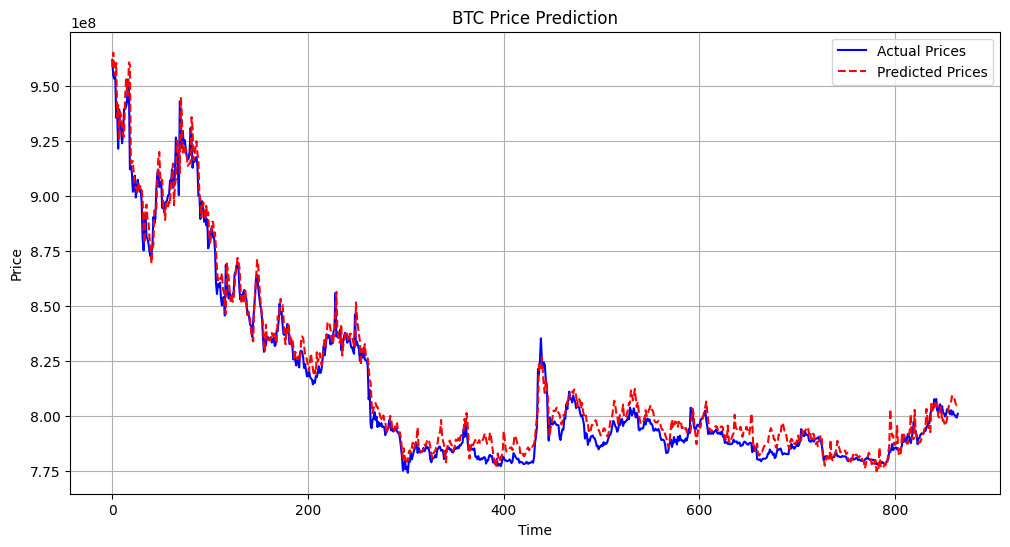

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to their original scale
def inverse_transform(data, scaler, n_features):
    expanded_data = np.zeros((data.shape[0], n_features))
    expanded_data[:, -1] = data.flatten()
    print(expanded_data.shape)
    return scaler.inverse_transform(expanded_data)[:, -1]

# Use the Bitcoin scaler for inverse transform
bitcoin_scaler = scalers['BTC']

n_features = bitcoin_scaler.min_.shape[0]


y_test_inverse = inverse_transform(y_test, bitcoin_scaler, n_features)
y_pred_inverse = inverse_transform(y_pred, bitcoin_scaler, n_features)

within_2_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.02)
within_5_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.05)
correct_direction = np.sum(np.sign(y_pred_inverse[1:] - y_pred_inverse[:-1]) == np.sign(y_test_inverse[1:] - y_test_inverse[:-1]))

total_predictions = len(y_test_inverse)

# Print metrics
coin = 'BTC'
print(f'{coin} - Predictions within 2%: {within_2_percent} / {total_predictions}')
print(f'{coin} - Predictions within 5%: {within_5_percent} / {total_predictions}')
print(f'{coin} - Predictions in correct direction: {correct_direction} / {total_predictions - 1}')

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='Actual Prices', color='blue')
plt.plot(y_pred_inverse, label='Predicted Prices', color='red', linestyle='--')
plt.title(f'{coin} Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

#Hyperparameter finetuning#

> Add blockquote



In [ ]:
pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
data.set_index('Date')

,Coin,Open,High,Low,Close,Volume_BTC,Volume_USD,SMA,EMA,Bollinger_Low,...,transaction_count_all_time,large_transaction_count,average_transaction_value,block_height,hashrate,difficulty,block_time,block_size,current_supply,Coin_original
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,BTC,28972.40000,29666.33000,28748.21000,29388.94000,5.084173e+04,1.487306e+09,25705.718571,26001.312544,26442.994316,...,601834524,15797,6.212788,664061,1.373737e+08,1.859959e+13,581.513514,1352232,1.858796e+07,BTC
2021-01-02,BTC,29388.94000,33257.29000,29036.26000,32203.64000,1.192148e+05,3.750441e+09,26302.784286,26828.289538,26206.435301,...,602131635,22745,7.284999,664212,1.396048e+08,1.859959e+13,572.220000,1395637,1.858891e+07,BTC
2021-01-03,BTC,32203.64000,34789.34000,32010.59000,33063.48000,9.351099e+04,3.132759e+09,26988.242857,27659.648267,26966.934688,...,602490751,24479,6.159027,664370,1.488970e+08,1.859959e+13,536.509554,1288693,1.858991e+07,BTC
2021-01-04,BTC,33063.48000,33622.70000,28493.29000,32030.55000,1.249097e+05,3.901979e+09,27652.772857,28242.435164,27859.060090,...,602864485,27457,5.144091,664543,1.594337e+08,1.859959e+13,501.052326,1318806,1.859090e+07,BTC
2021-01-05,BTC,32030.55000,34487.44000,29985.29000,34038.29000,9.373547e+04,3.037657e+09,28382.413571,29015.215809,29041.361891,...,603218576,25699,6.241091,664700,1.454805e+08,1.859959e+13,549.108974,1292713,1.859200e+07,BTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,DOGE,0.09367,0.09498,0.09109,0.09177,2.837260e+08,2.638037e+07,0.093088,0.093000,0.090200,...,185389305,1341,17810.043579,5025355,8.844191e+02,1.316255e+07,63.920741,264191,1.424398e+11,DOGE
2023-12-29,DOGE,0.09177,0.09303,0.08864,0.09101,2.620044e+08,2.392561e+07,0.092946,0.092734,0.089773,...,186131898,1276,19594.689191,5026714,8.848679e+02,1.309332e+07,63.552283,204626,1.424398e+11,DOGE
2023-12-30,DOGE,0.09101,0.09140,0.08926,0.09001,1.258114e+08,1.139420e+07,0.092440,0.092371,0.089160,...,186891885,972,14100.270655,5028079,9.095739e+02,1.339441e+07,63.247801,209059,1.424533e+11,DOGE


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import keras_tuner as kt

# Load your dataset
df = data

# Retain the original 'Coin' column
df['Coin_original'] = df['Coin']

# One-hot encode the 'Coin' column
df = pd.get_dummies(df, columns=['Coin'])

# Drop the date column if not needed
df = df.drop(columns=['Date'])

# Scale data for each coin separately
scalers = {}
for coin in df['Coin_original'].unique():
    scalers[coin] = MinMaxScaler()
    coin_data = df[df['Coin_original'] == coin]
    df.loc[df['Coin_original'] == coin, df.columns.difference(['Coin_original'])] = scalers[coin].fit_transform(coin_data[df.columns.difference(['Coin_original'])])

# Drop the 'Coin_original' column if not needed further
df = df.drop(columns=['Coin_original'])

# Create sequences for LSTM
def create_sequences(data, seq_length=60, target_column='Close'):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length].values
        target = data.iloc[i + seq_length][target_column]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences, dtype=np.float32), np.array(targets, dtype=np.float32)

sequences, targets = create_sequences(df)

# Ensure data types are correct
sequences = np.array(sequences, dtype=np.float32)
targets = np.array(targets, dtype=np.float32)

# Split data into training and testing sets
train_size = int(len(sequences) * 0.8)
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, shuffle=False)

# Define the function to build the model for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=512, step=32),
        return_sequences=True,
        input_shape=(X_train.shape[1], X_train.shape[2])
    ))
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=512, step=32)
    ))
    model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
        ),
        loss='mean_squared_error'
    )
    return model

# Create the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=20,
    factor=3,
    directory='my_dir',
    project_name='lstm_tuning'
)

# Define early stopping callback
stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the LSTM layers is {best_hps.get('units')} with a dropout rate of {best_hps.get('dropout')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), callbacks=[stop_early])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to their original scale
def inverse_transform(data, scaler, n_features):
    expanded_data = np.zeros((data.shape[0], n_features))
    expanded_data[:, -1] = data.flatten()
    return scaler.inverse_transform(expanded_data)[:, -1]

# Use the Bitcoin scaler for inverse transform
bitcoin_scaler = scalers['BTC']
n_features = bitcoin_scaler.min_.shape[0]

y_test_inverse = inverse_transform(y_test, bitcoin_scaler, n_features)
y_pred_inverse = inverse_transform(y_pred, bitcoin_scaler, n_features)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test_inverse, label='Actual Bitcoin Close Price', color='blue')
plt.plot(y_pred_inverse, label='Predicted Bitcoin Close Price', color='red', linestyle='--')
plt.title('Bitcoin Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate metrics
within_2_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.02)
within_5_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.05)
correct_direction = np.sum(np.sign(y_pred_inverse[1:] - y_pred_inverse[:-1]) == np.sign(y_test_inverse[1:] - y_test_inverse[:-1]))

total_predictions = len(y_test_inverse)
print(f'Bitcoin - Predictions within 2%: {within_2_percent} / {total_predictions}')
print(f'Bitcoin - Predictions within 5%: {within_5_percent} / {total_predictions}')
print(f'Bitcoin - Predictions in correct direction: {correct_direction} / {total_predictions - 1}')


Trial 13 Complete [00h 03m 08s]
val_loss: 0.0017966764280572534

Best val_loss So Far: 0.0017966764280572534
Total elapsed time: 00h 29m 26s

Search: Running Trial #14

Value             |Best Value So Far |Hyperparameter
448               |320               |units
0.2               |0.2               |dropout
0.0062894         |0.0014229         |learning_rate
7                 |7                 |tuner/epochs
3                 |3                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
1                 |1                 |tuner/round
0008              |0000              |tuner/trial_id

Epoch 4/7
44/44 [==============================] - ETA: 0s - loss: 0.0046

KeyboardInterrupt: 

Epoch 1/50
55/55 [==============================] - 61s 1s/step - loss: 0.0751 - val_loss: 0.0039
Epoch 2/50
55/55 [==============================] - 65s 1s/step - loss: 0.0032 - val_loss: 0.0015
Epoch 3/50
55/55 [==============================] - 57s 1s/step - loss: 0.0025 - val_loss: 4.4509e-04
Epoch 4/50
55/55 [==============================] - 56s 1s/step - loss: 0.0021 - val_loss: 5.8655e-04
Epoch 5/50
55/55 [==============================] - 58s 1s/step - loss: 0.0020 - val_loss: 5.0762e-04
Epoch 6/50
55/55 [==============================] - 59s 1s/step - loss: 0.0019 - val_loss: 4.2589e-04
Epoch 7/50
55/55 [==============================] - 57s 1s/step - loss: 0.0019 - val_loss: 3.7565e-04
Epoch 8/50
55/55 [==============================] - 57s 1s/step - loss: 0.0016 - val_loss: 7.6067e-04
Epoch 9/50
55/55 [==============================] - 57s 1s/step - loss: 0.0016 - val_loss: 2.0200e-04
Epoch 10/50
55/55 [==============================] - 57s 1s/step - loss: 0.0015 - val_loss

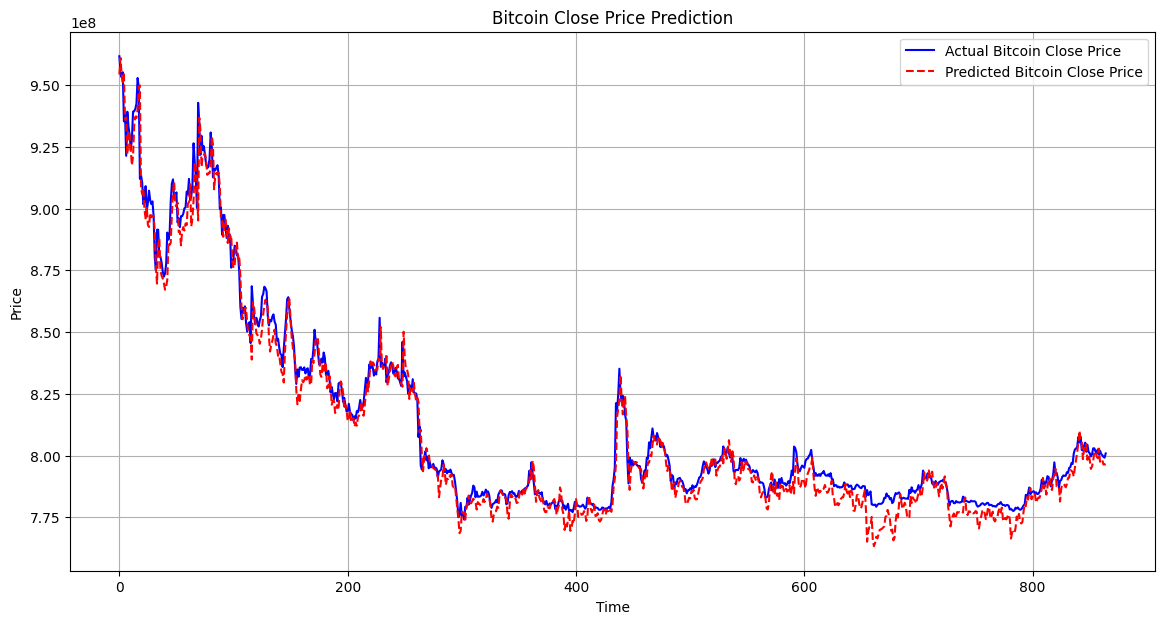

Bitcoin - Predictions within 2%: 849 / 865
Bitcoin - Predictions within 5%: 864 / 865
Bitcoin - Predictions in correct direction: 392 / 864


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import keras_tuner as kt

# Load your dataset
df = data

# Retain the original 'Coin' column
df['Coin_original'] = df['Coin']

# One-hot encode the 'Coin' column
df = pd.get_dummies(df, columns=['Coin'])

# Drop the date column if not needed
df = df.drop(columns=['Date'])

# Scale data for each coin separately
scalers = {}
for coin in df['Coin_original'].unique():
    scalers[coin] = MinMaxScaler()
    coin_data = df[df['Coin_original'] == coin]
    df.loc[df['Coin_original'] == coin, df.columns.difference(['Coin_original'])] = scalers[coin].fit_transform(coin_data[df.columns.difference(['Coin_original'])])

# Drop the 'Coin_original' column if not needed further
df = df.drop(columns=['Coin_original'])

# Create sequences for LSTM
def create_sequences(data, seq_length=60, target_column='Close'):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data.iloc[i:i + seq_length].values
        target = data.iloc[i + seq_length][target_column]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences, dtype=np.float32), np.array(targets, dtype=np.float32)

sequences, targets = create_sequences(df)

# Ensure data types are correct
sequences = np.array(sequences, dtype=np.float32)
targets = np.array(targets, dtype=np.float32)

# Split data into training and testing sets
train_size = int(len(sequences) * 0.8)
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, shuffle=False)

# Build the model with the best hyperparameters
best_units = 320
best_dropout = 0.2
best_learning_rate = 0.0014229

model = Sequential()
model.add(LSTM(best_units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(best_units))
model.add(Dropout(best_dropout))
model.add(Dense(1))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=best_learning_rate), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to their original scale
def inverse_transform(data, scaler, n_features):
    expanded_data = np.zeros((data.shape[0], n_features))
    expanded_data[:, -1] = data.flatten()
    return scaler.inverse_transform(expanded_data)[:, -1]

# Use the Bitcoin scaler for inverse transform
bitcoin_scaler = scalers['BTC']
n_features = bitcoin_scaler.min_.shape[0]

y_test_inverse = inverse_transform(y_test, bitcoin_scaler, n_features)
y_pred_inverse = inverse_transform(y_pred, bitcoin_scaler, n_features)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test_inverse, label='Actual Bitcoin Close Price', color='blue')
plt.plot(y_pred_inverse, label='Predicted Bitcoin Close Price', color='red', linestyle='--')
plt.title('Bitcoin Close Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate metrics
within_2_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.02)
within_5_percent = np.sum(np.abs(y_pred_inverse - y_test_inverse) / y_test_inverse <= 0.05)
correct_direction = np.sum(np.sign(y_pred_inverse[1:] - y_pred_inverse[:-1]) == np.sign(y_test_inverse[1:] - y_test_inverse[:-1]))

total_predictions = len(y_test_inverse)
print(f'Bitcoin - Predictions within 2%: {within_2_percent} / {total_predictions}')
print(f'Bitcoin - Predictions within 5%: {within_5_percent} / {total_predictions}')
print(f'Bitcoin - Predictions in correct direction: {correct_direction} / {total_predictions - 1}')
